# Antarctic Cities Data Analysis

## Data Preparation

Loads common imports, and defines some generic SPSS functions.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import savReaderWriter
import seaborn as sns


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9)

Load the data set.

In [8]:
import common as c
ds = c.DataSet("data/pa.sav")


## Exploratory data

In [9]:
ds.data.head()

,Folio,Location,An_1,An_2,An_3,An_4,An_5,An_6,An_7,An_8,...,Soc_2a,Soc_2b,Soc_4,Soc_5,Soc_6,Soc_7,Soc_8,Soc_9a,Soc_9b,Soc_10
0,314.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,2.0,2.0,2.0,6.0,4.0,23.0,NaN,1.0
1,317.0,1.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,...,20.0,NaN,2.0,1.0,2.0,6.0,4.0,20.0,NaN,7.0
2,316.0,1.0,4.0,3.0,3.0,4.0,4.0,5.0,3.0,4.0,...,18.0,NaN,2.0,2.0,2.0,6.0,4.0,18.0,NaN,1.0
3,319.0,1.0,4.0,4.0,4.0,4.0,3.0,5.0,2.0,1.0,...,42.0,NaN,2.0,1.0,2.0,4.0,4.0,5.0,NaN,2.0
4,318.0,1.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,4.0,...,23.0,NaN,2.0,2.0,2.0,7.0,4.0,23.0,NaN,1.0


## Age

In [25]:
np.floor(ds.data['Soc_2a'] / 10.).value_counts().sort_index()

1.0     39
2.0    165
3.0     21
4.0     20
5.0     28
6.0      4
9.0      1
Name: Soc_2a, dtype: int64

In [29]:
ds.data['Soc_2b'].dropna().value_counts().sort_index()

1.0    4
2.0    5
3.0    1
4.0    1
5.0    5
6.0    3
Name: Soc_2b, dtype: int64

In [99]:
tmp = ds.data.loc[:, ['Soc_2a', 'Soc_3', 'Folio']]
tmp.columns = ['age', 'sex', 'Folio']
tmp['sex'].replace([1., 2., 3.],['Male', 'Female', 'Other'],inplace=True)
tmp.loc[:,'decade'] = pd.Series(np.floor(tmp.loc[:,'age'] / 10.))
tmp.drop(['age'], axis=1, inplace = True)
# tmp['decade'] = tmp['decade'].astype(int)
age_sex_a = tmp.groupby(by = ['decade', 'sex']).size().unstack(level=1)
age_sex_a.loc[6.0,:] = np.sum(age_sex_a.loc[6.0:9.0,:])
age_sex_a.drop(9.0, axis=0, inplace = True)
print(age_sex_a)

sex     Female  Male
decade              
1.0        6.0  32.0
2.0       72.0  93.0
3.0        8.0  13.0
4.0       10.0  10.0
5.0       13.0  15.0
6.0        3.0   2.0


In [100]:
tmp = ds.data.loc[:, ['Soc_2b', 'Soc_3']]
tmp.columns = ['age', 'sex']
tmp = tmp.dropna(axis = 0, subset = ['age'])
tmp['sex'].replace([1., 2., 3.],['Male', 'Female', 'Other'],inplace=True)
age_sex_b = tmp.groupby(by = ['age', 'sex']).size().unstack(level=1)
print(age_sex_b)

sex  Female  Male  Other
age                     
1.0     1.0   3.0    NaN
2.0     2.0   2.0    1.0
3.0     1.0   NaN    NaN
4.0     NaN   1.0    NaN
5.0     1.0   4.0    NaN
6.0     1.0   2.0    NaN


In [148]:
age_sex = age_sex_a.join(age_sex_b, how='outer', lsuffix='_a', rsuffix='_b', sort=True)
age_sex['Female'] = age_sex['Female_a'] + age_sex['Female_b']
age_sex['Male'] = age_sex['Male_a'] + age_sex['Male_b']
age_sex.drop(['Female_a', 'Female_b', 'Male_a', 'Male_b'], axis=1, inplace = True)
age_sex.fillna(0., inplace = True)
age_sex = age_sex.astype(int)
age_sex['Total'] = np.sum(age_sex, axis = 1)
age_sex['%'] = (100 * age_sex['Total'] / np.sum(age_sex['Total'], axis = 0)).round(1)
new_index =  list((age_sex.index.astype(int) * 10).astype(str) + ' - ' + (age_sex.index.astype(int) * 10 + 9).astype(str))
new_index[0] = '18 - 19'
new_index[-1] = '60+'
age_sex.index = new_index
age_sex.index.name = 'age'
print(age_sex)


sex      Other  Female  Male  Total     %
age                                      
18 - 19      0       7    35     42  15.4
20 - 29      1      74    95    170  62.3
30 - 39      0       9     0      9   3.3
40 - 49      0       0    11     11   4.0
50 - 59      0      14    19     33  12.1
60+          0       4     4      8   2.9


In [154]:
import tabulate
from IPython.display import HTML, display
s = tabulate.tabulate(age_sex, headers="keys", tablefmt='html')
display(HTML(s))

age,Other,Female,Male,Total,%
18 - 19,0,7,35,42,15.4
20 - 29,1,74,95,170,62.3
30 - 39,0,9,0,9,3.3
40 - 49,0,0,11,11,4
50 - 59,0,14,19,33,12.1
60+,0,4,4,8,2.9


In [156]:
age_sex.sum(axis = 0) / age_sex.sum(axis = 0)['Total']

sex
Other     0.003663
Female    0.395604
Male      0.600733
Total     1.000000
%         0.366300
dtype: float64

## Graphs

Renders all of the graphs using the histogram function.

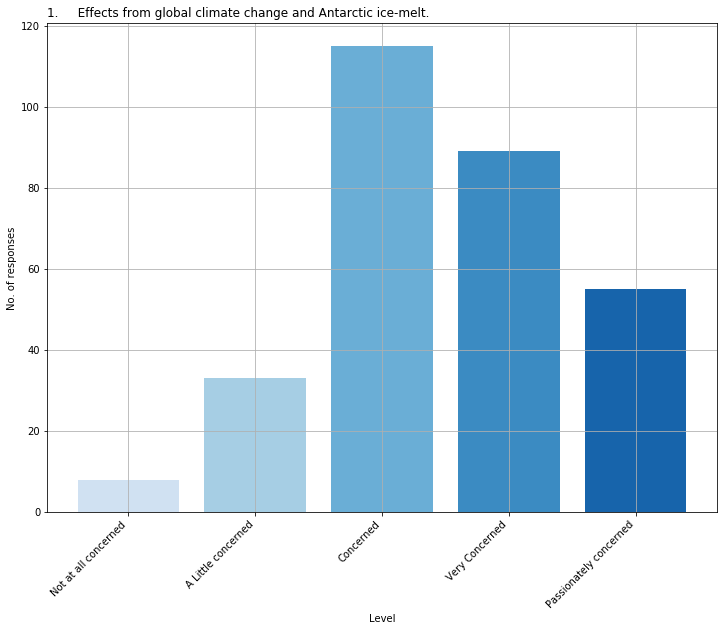

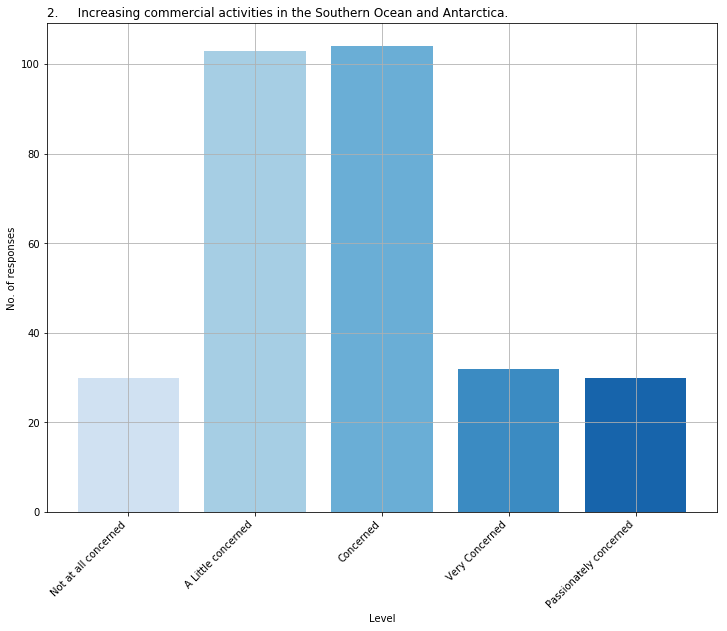

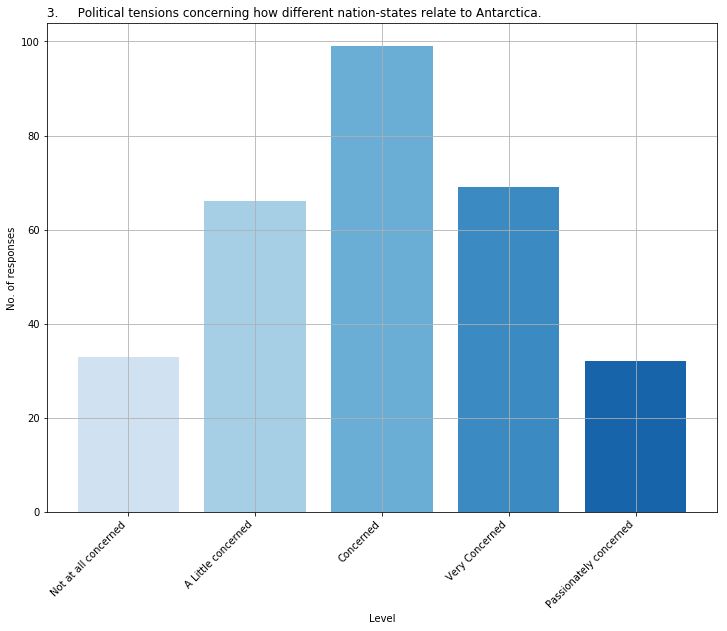

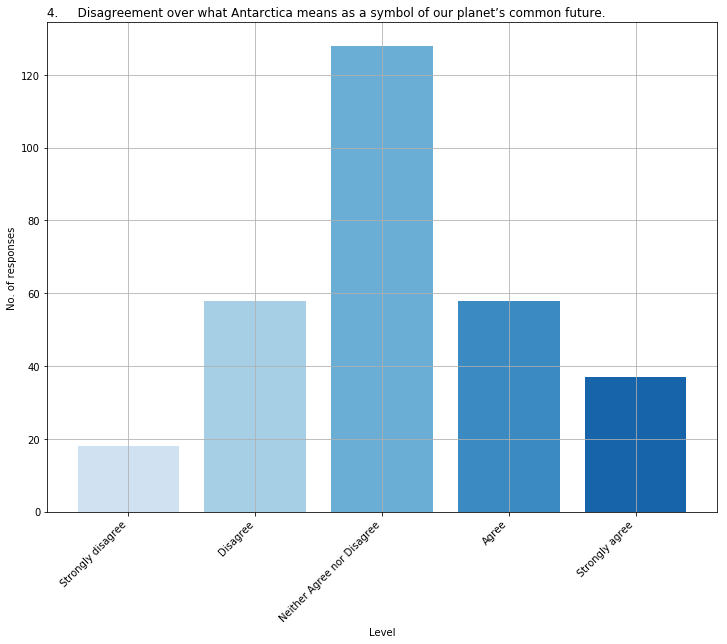

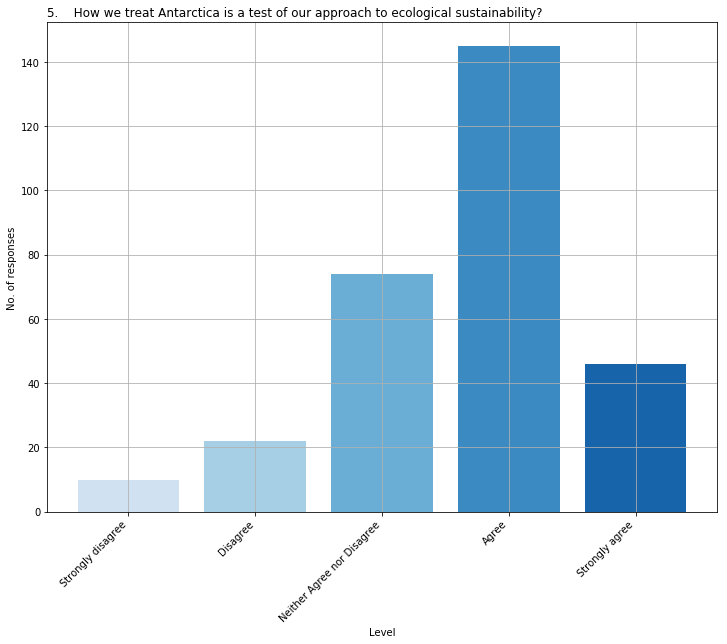

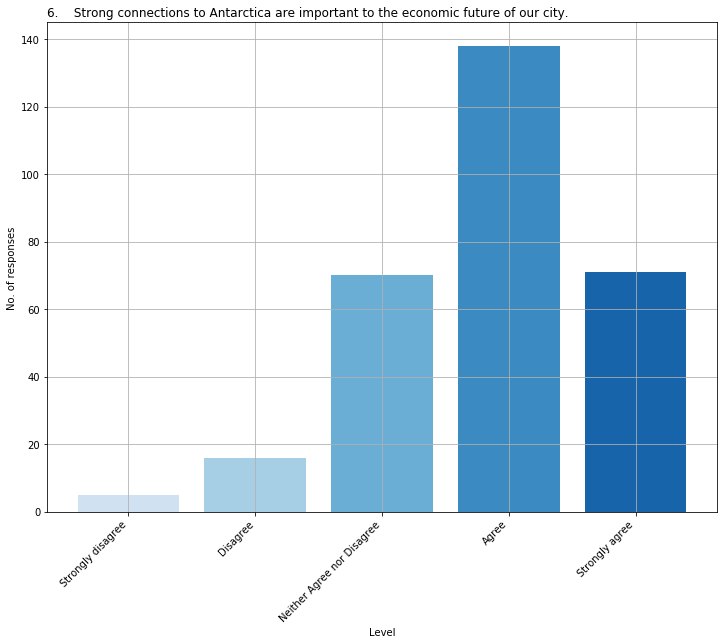

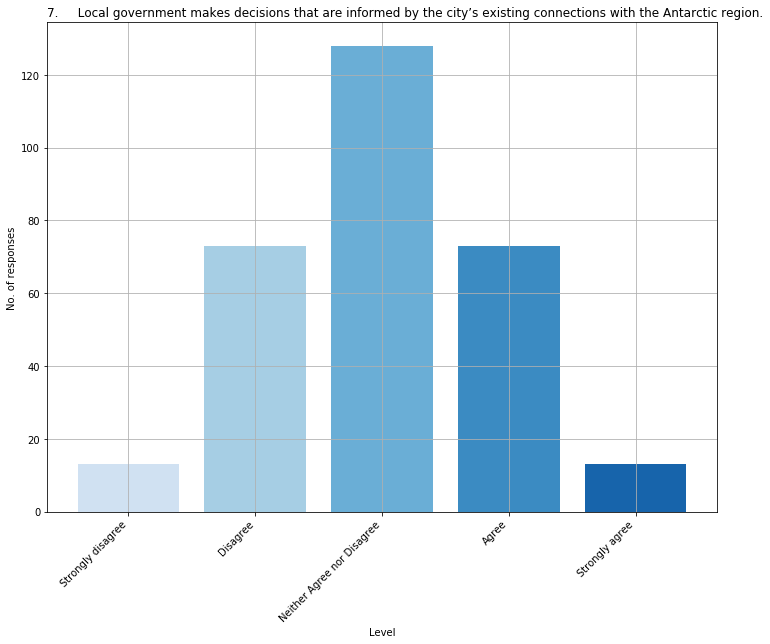

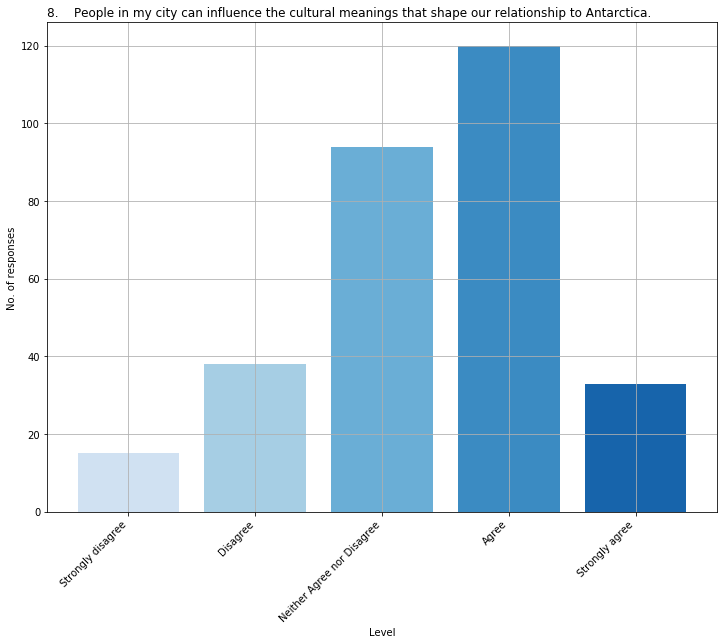

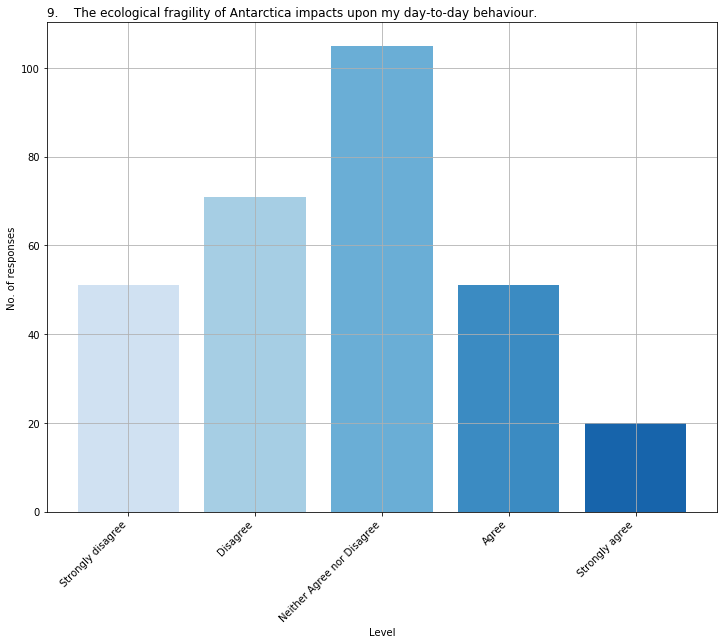

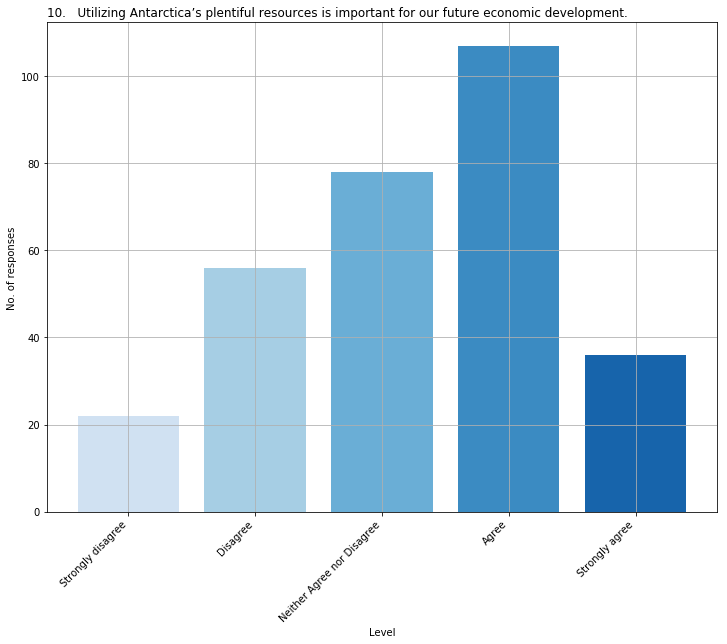

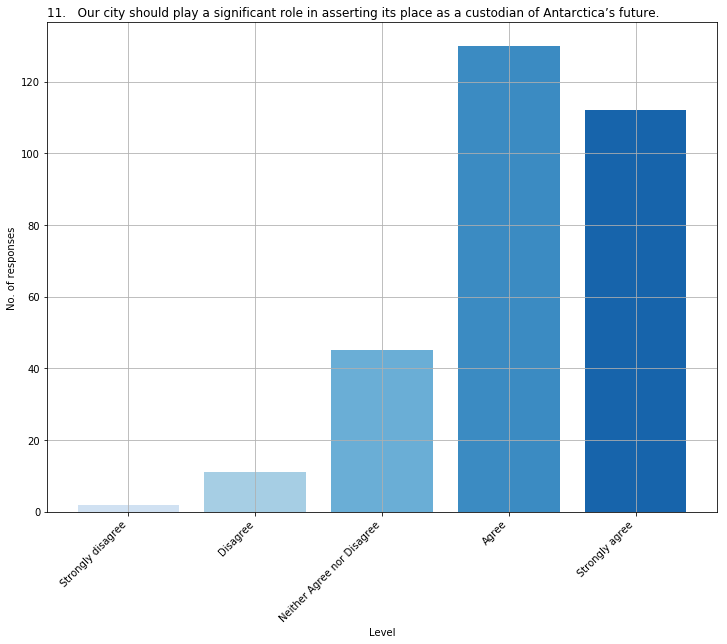

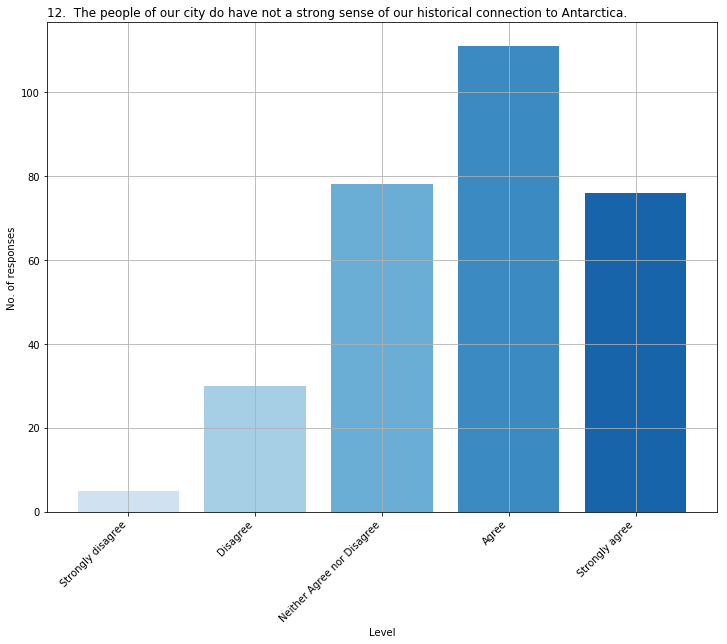

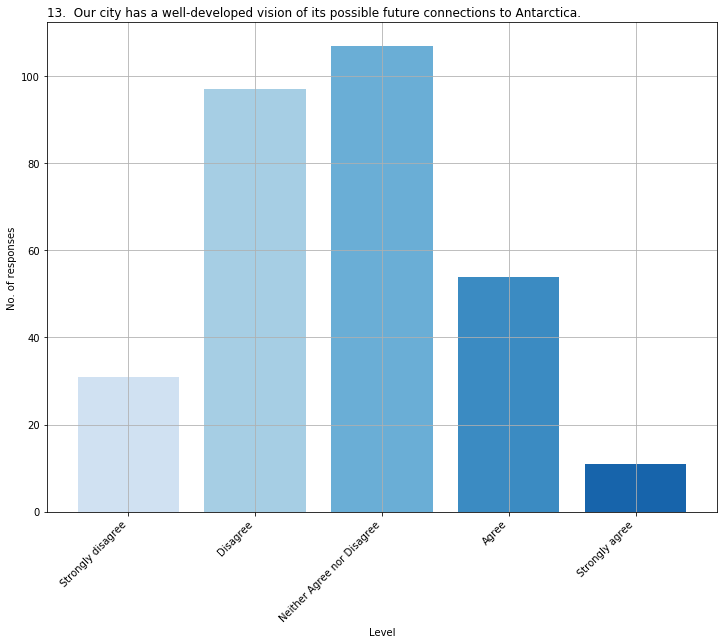

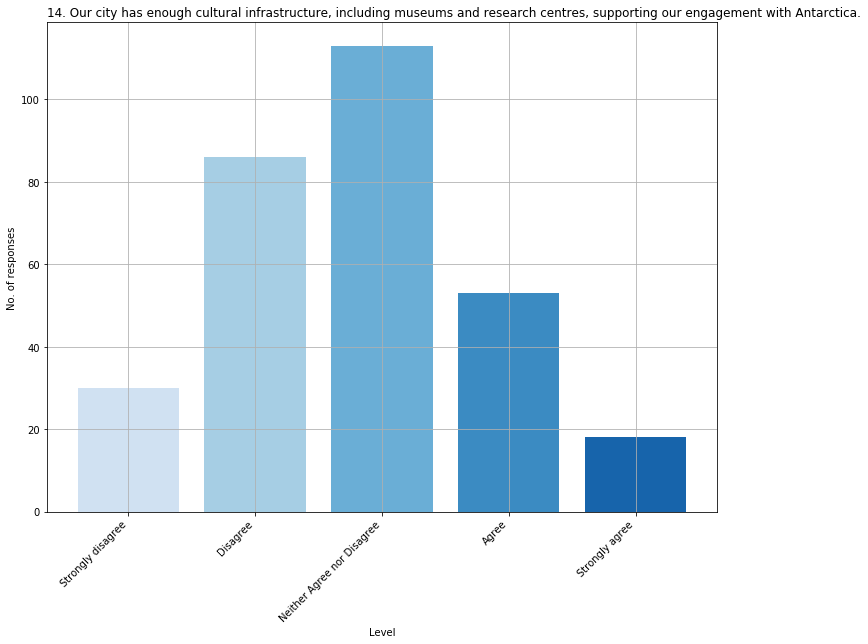

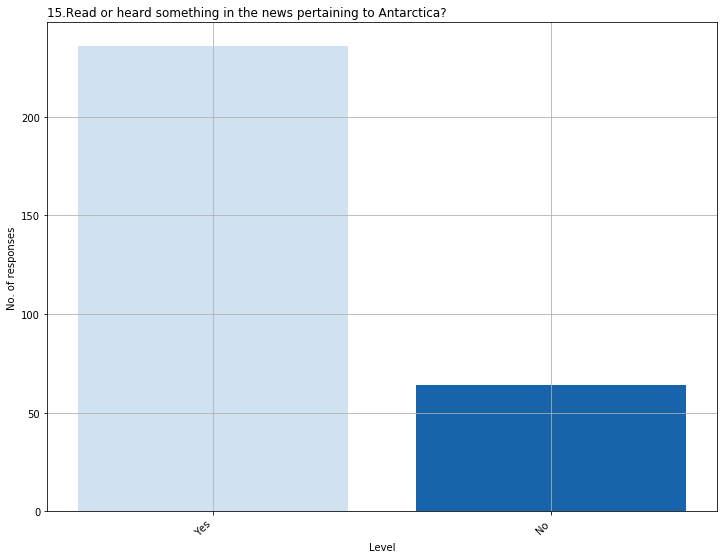

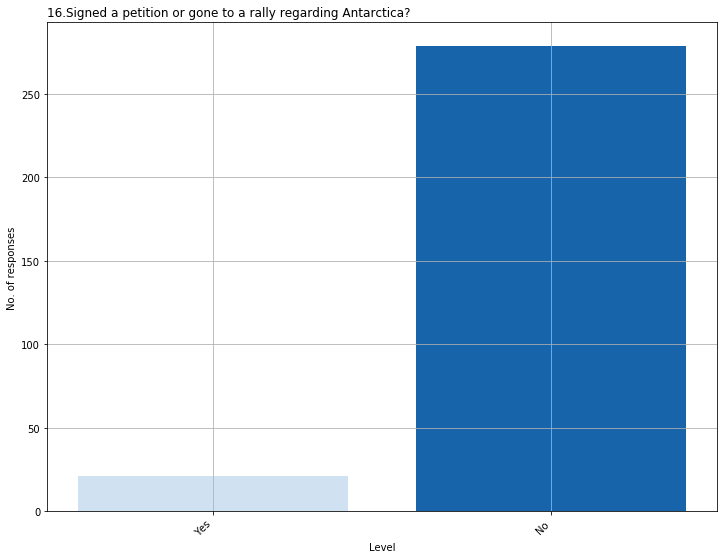

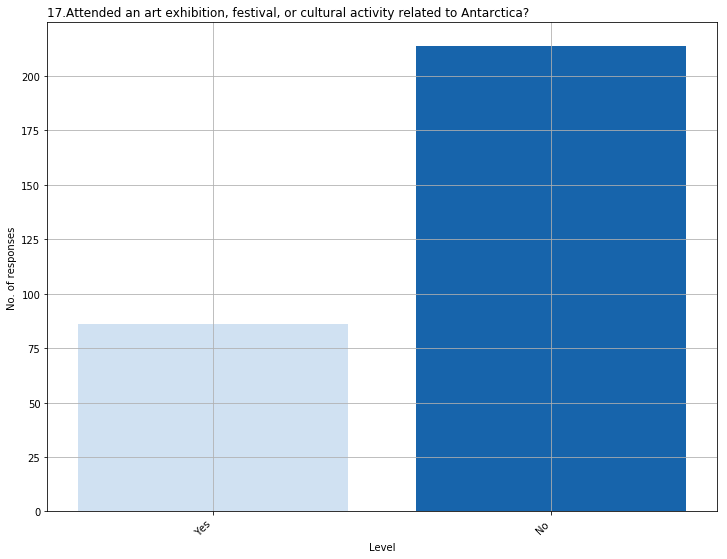

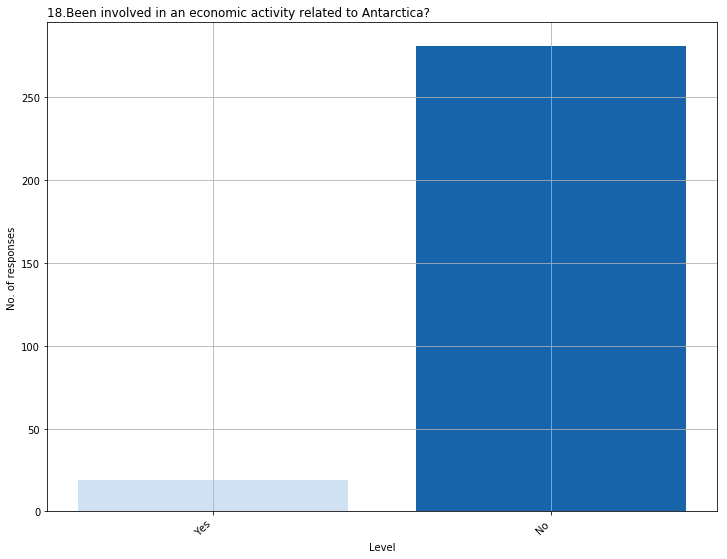

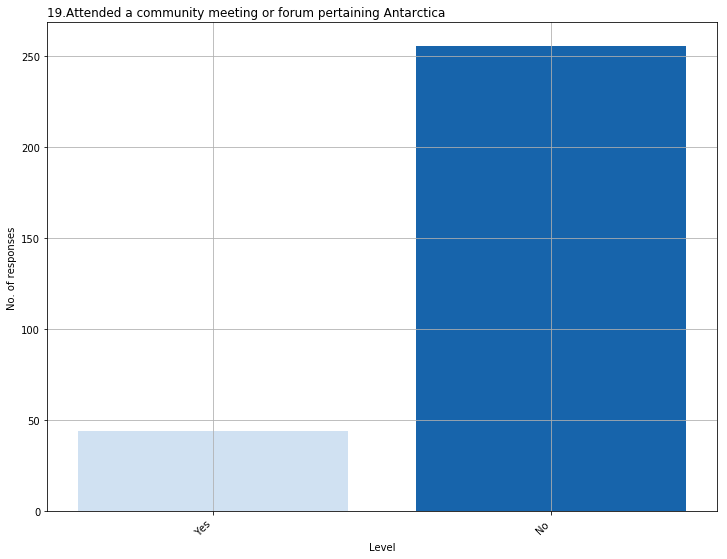

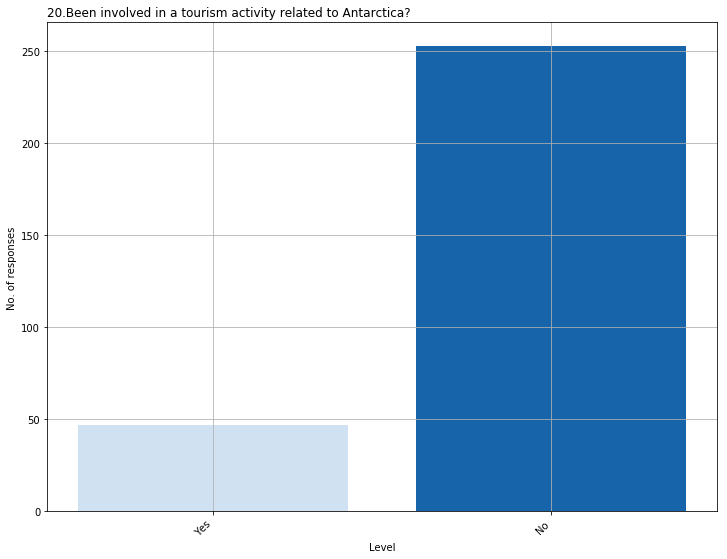

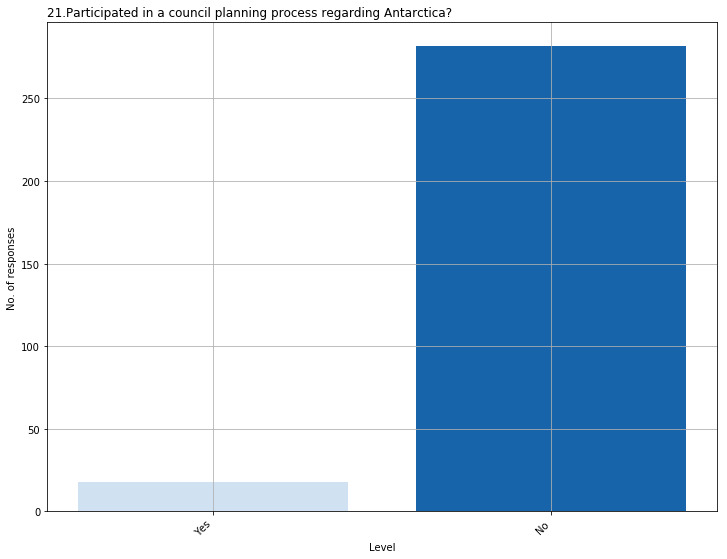

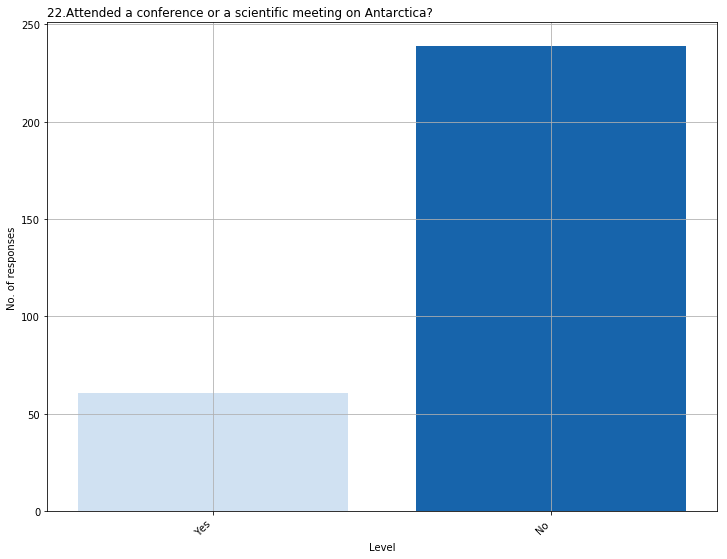

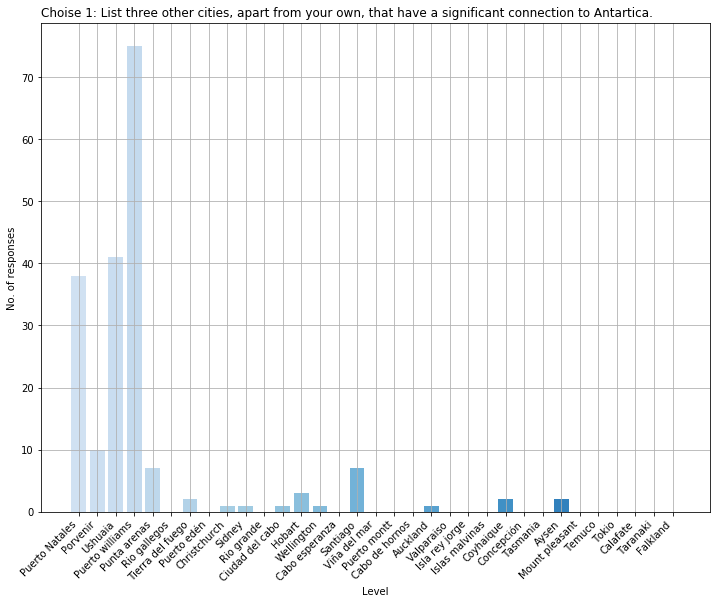

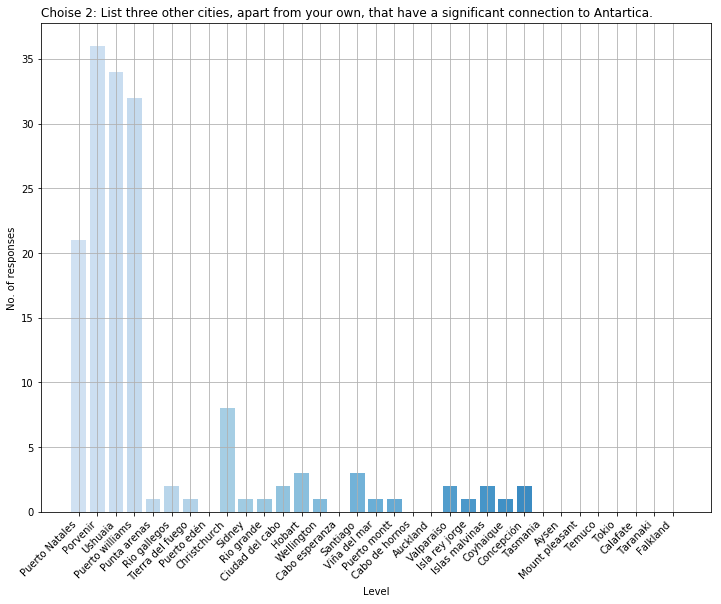

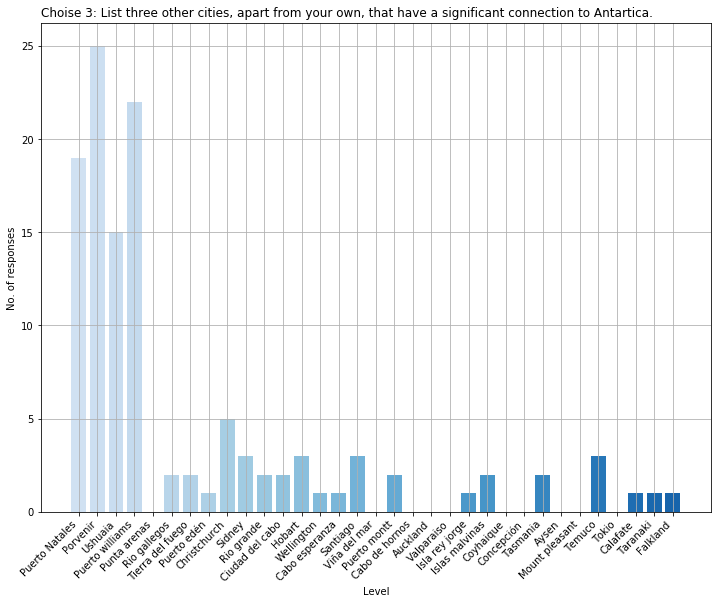

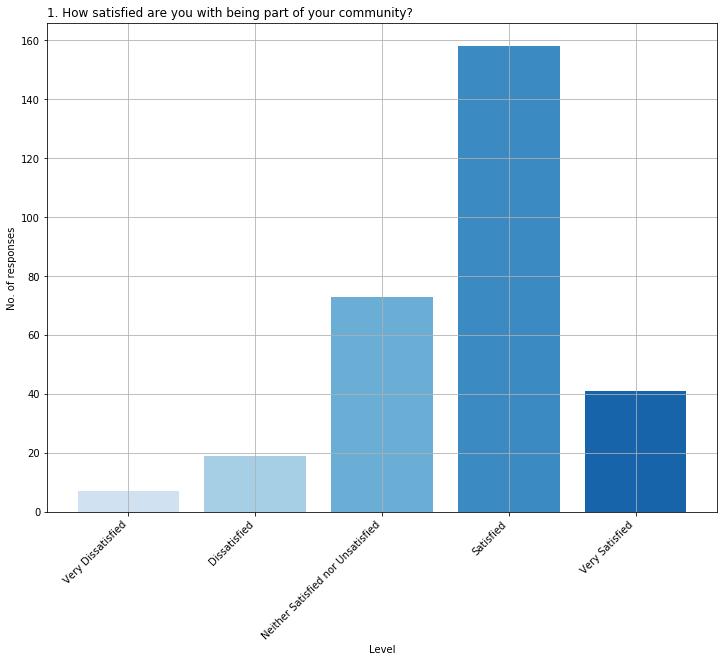

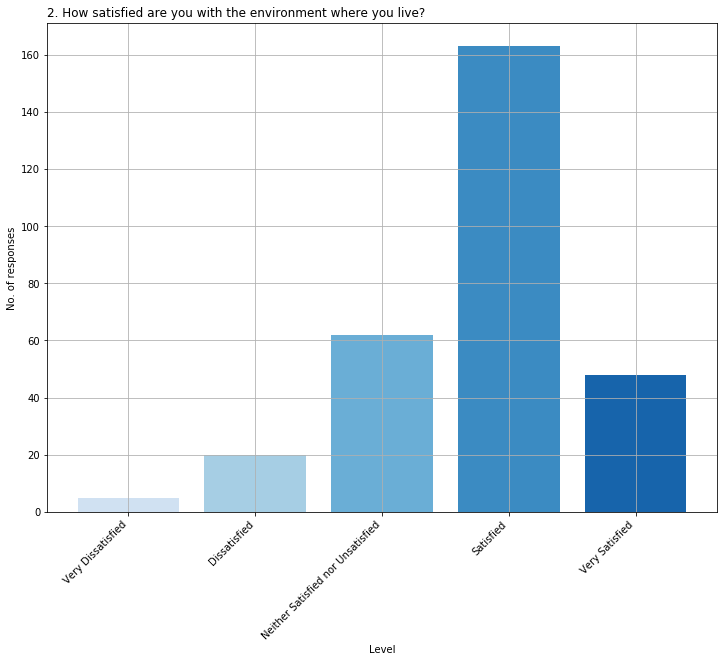

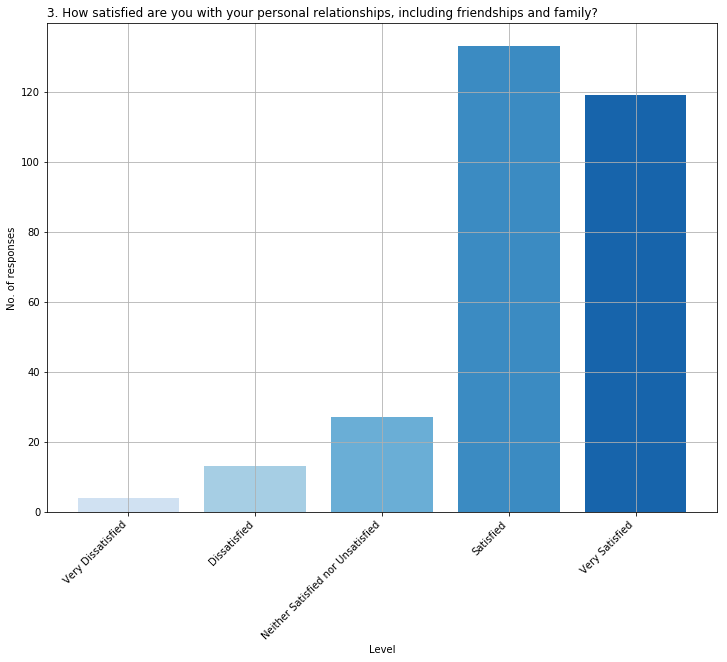

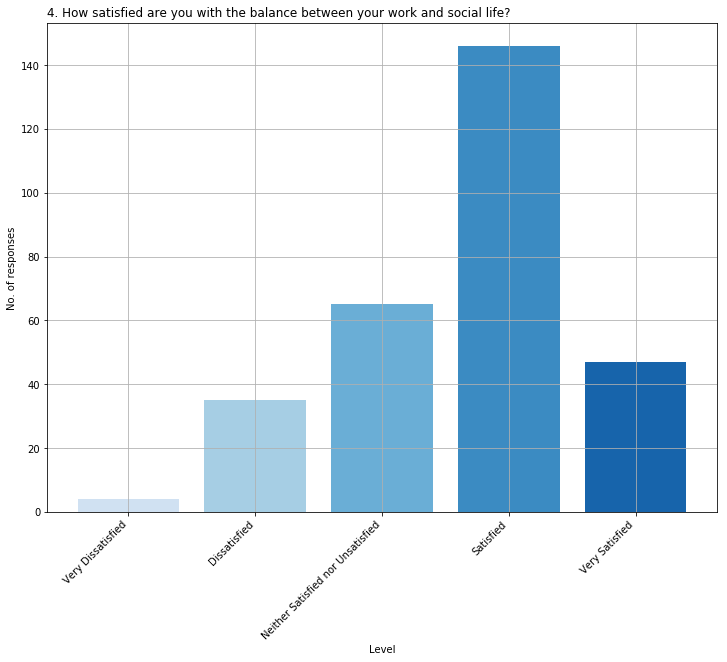

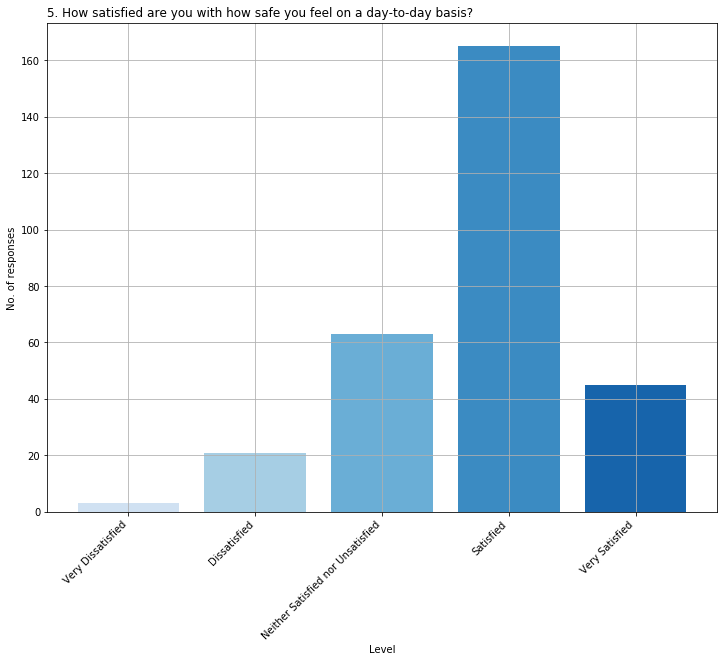

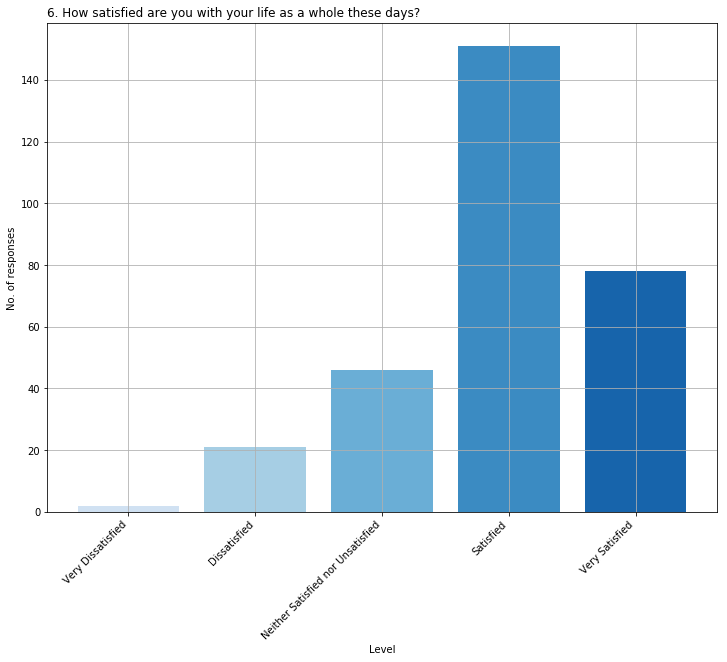

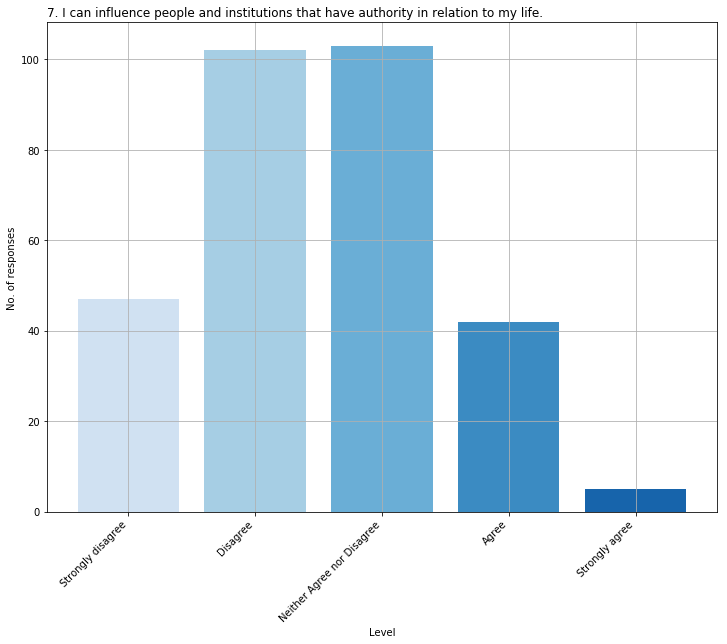

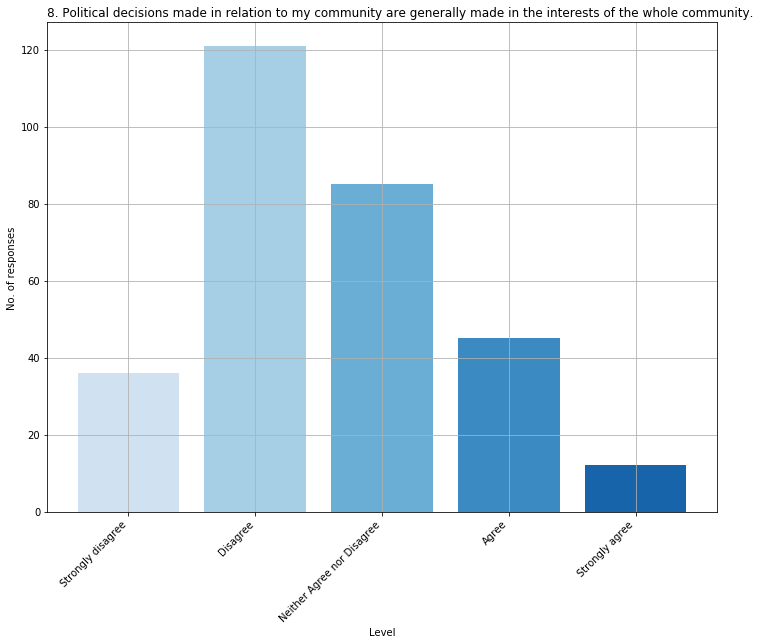

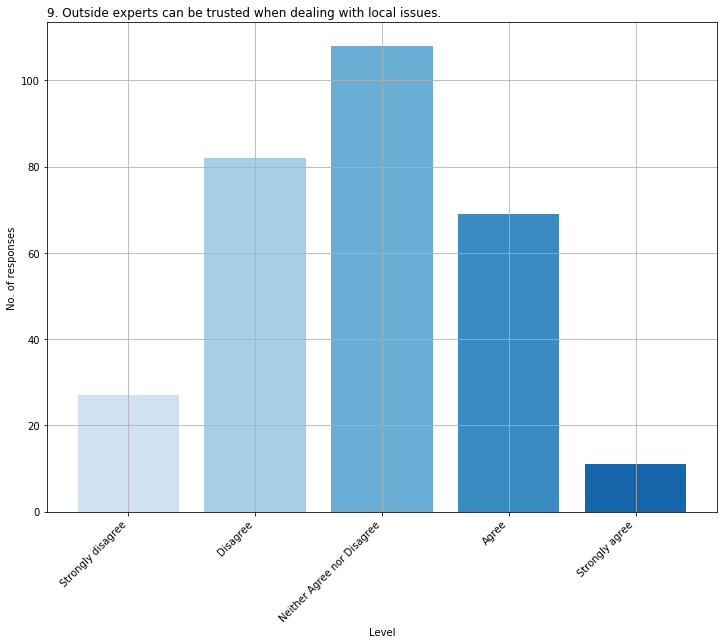

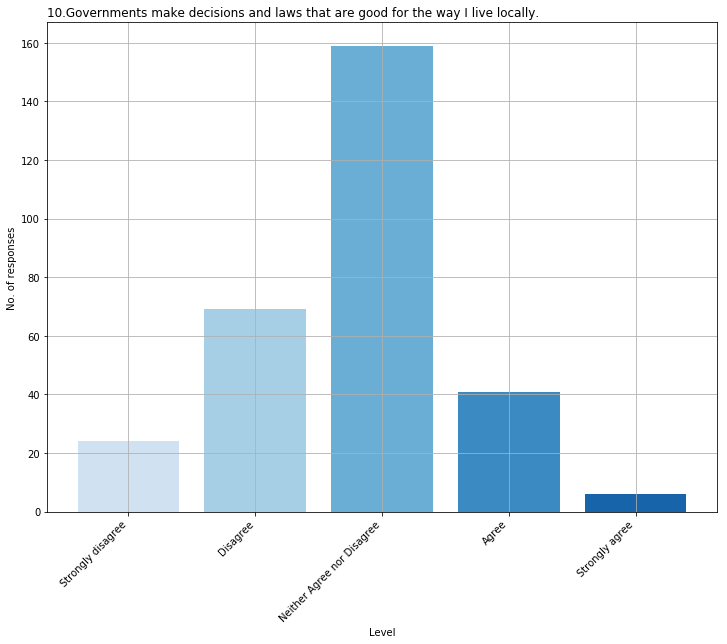

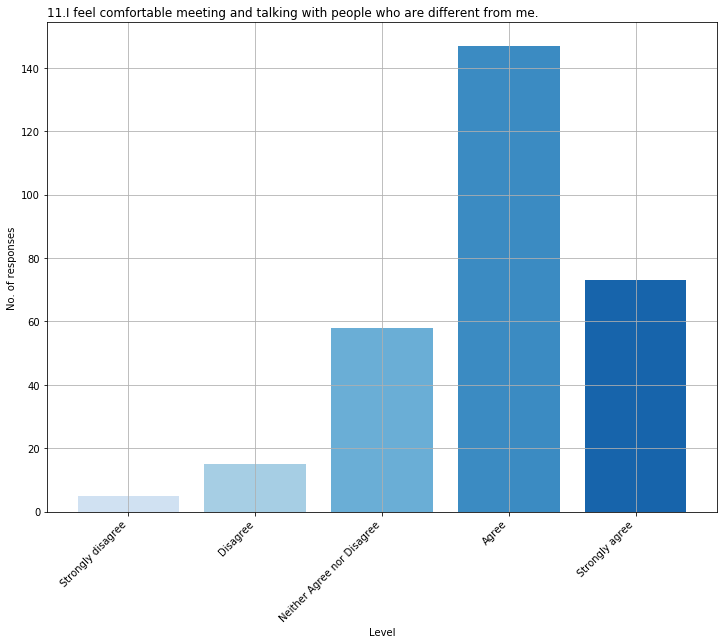

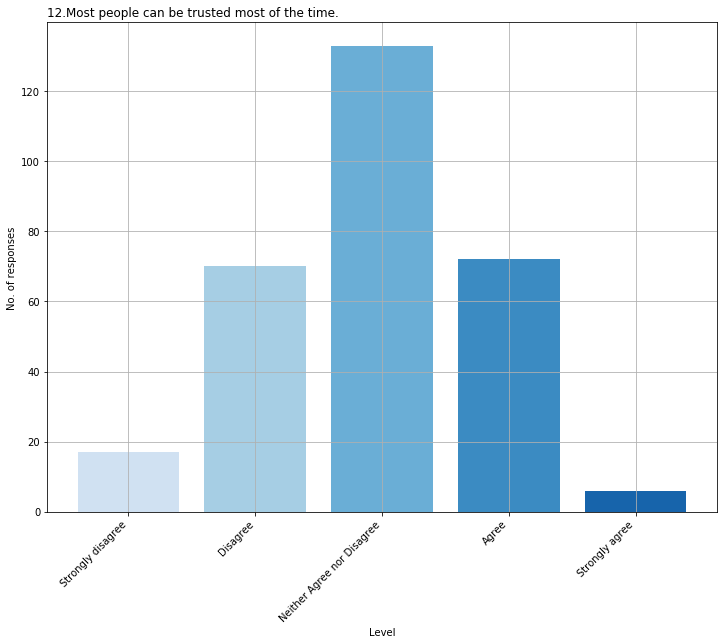

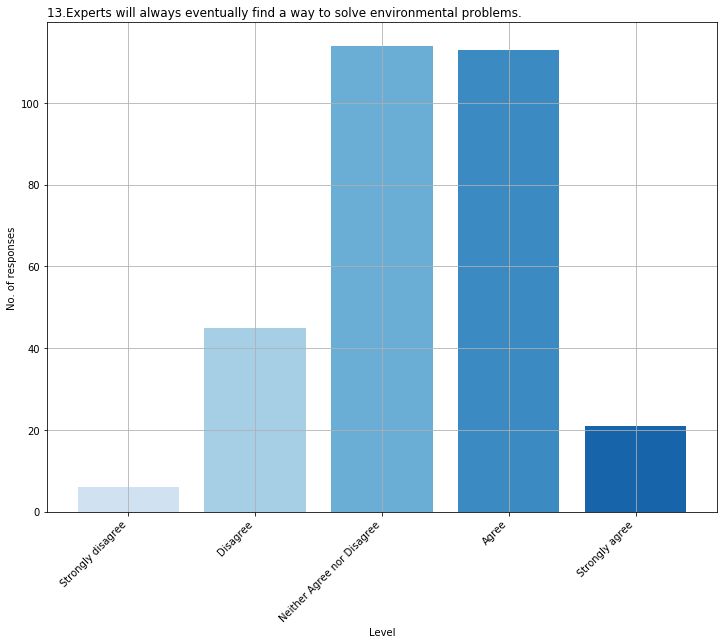

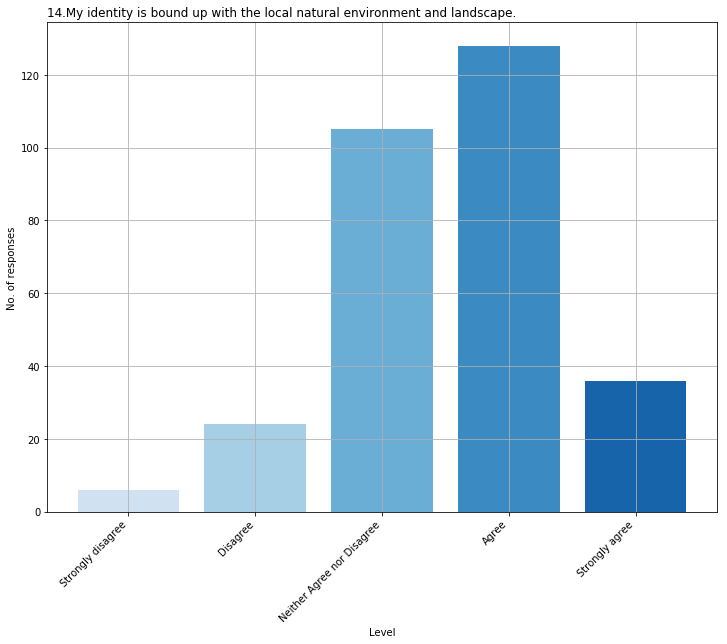

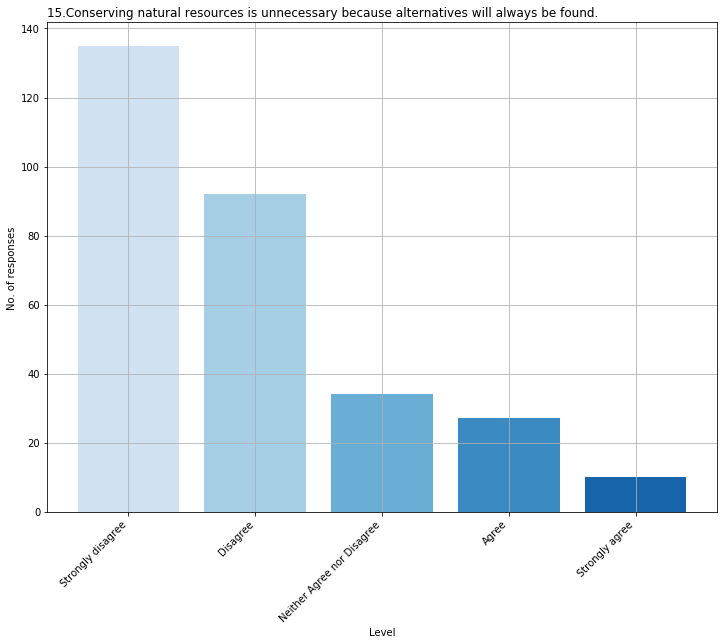

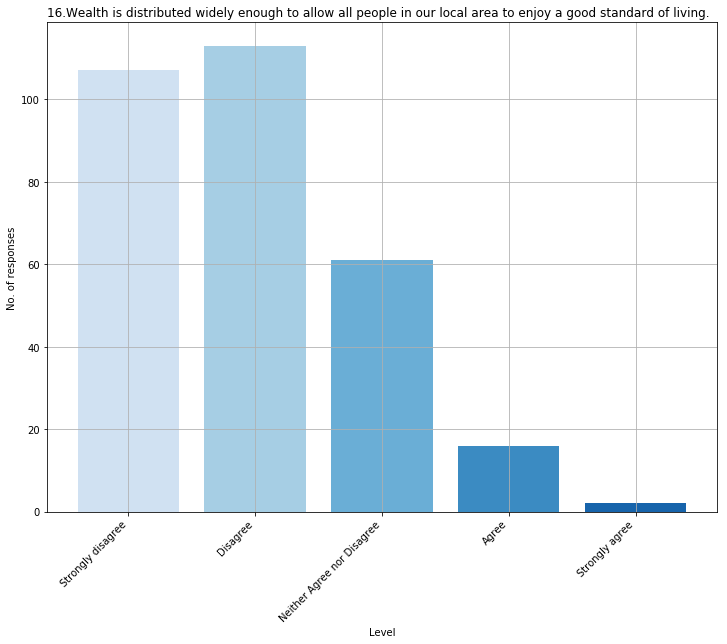

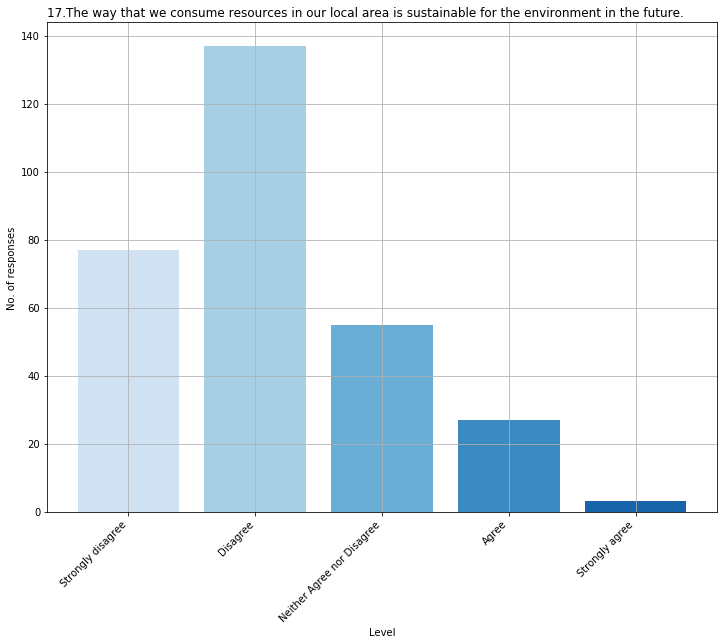

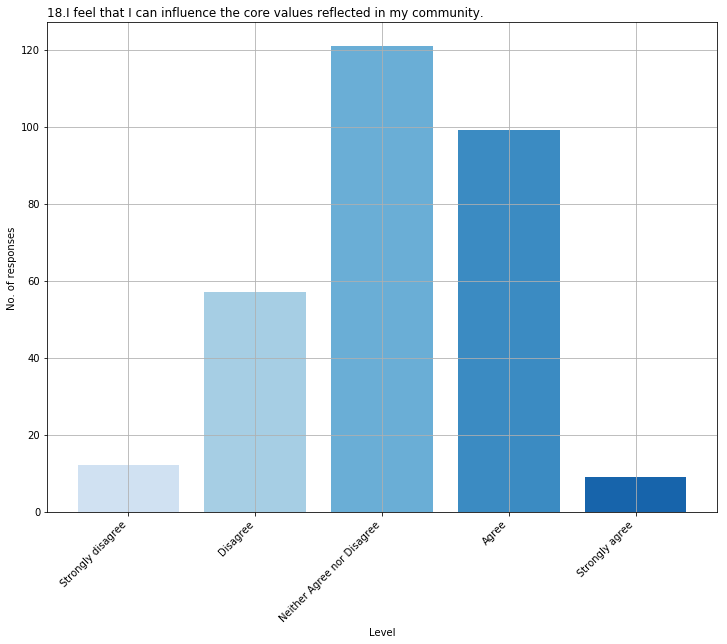

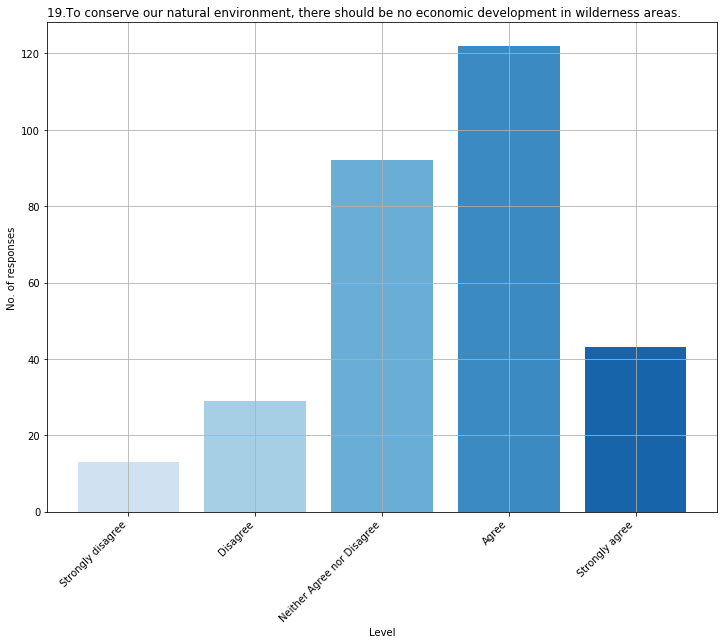

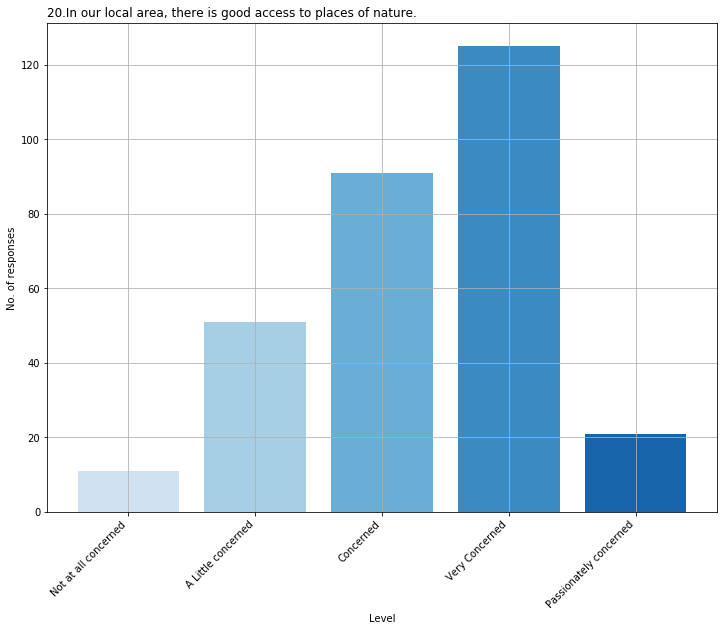

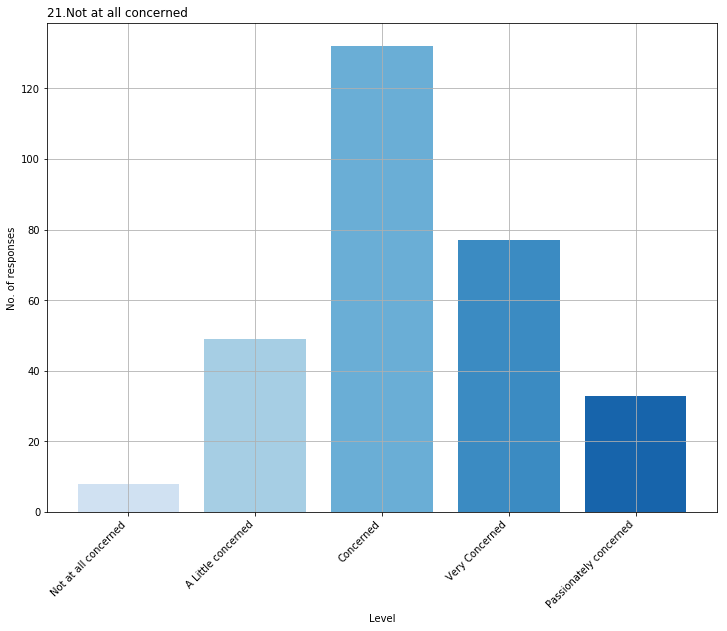

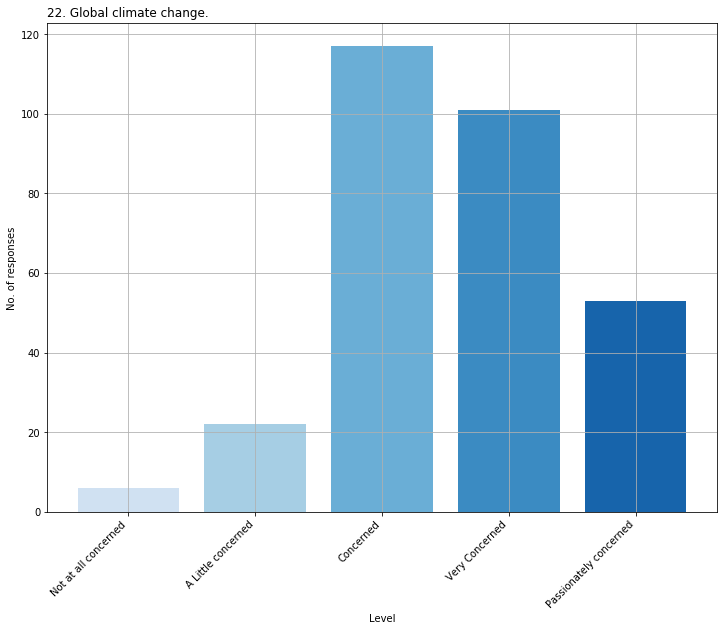

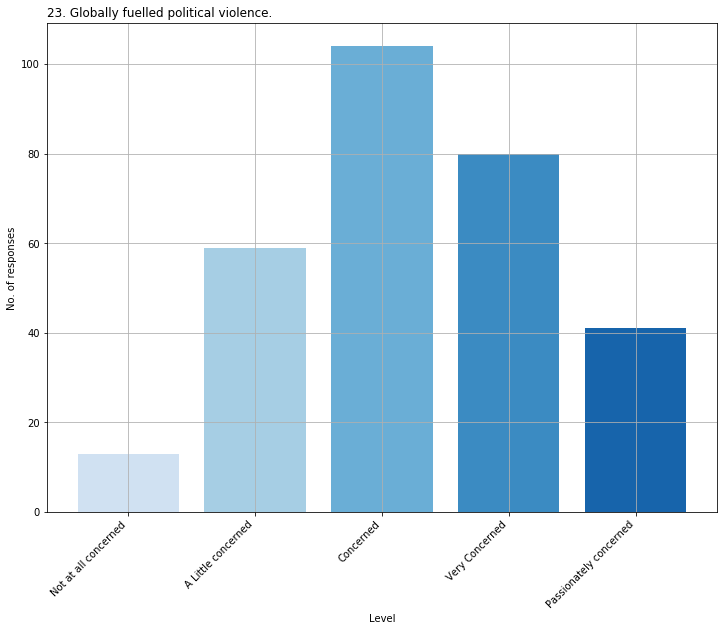

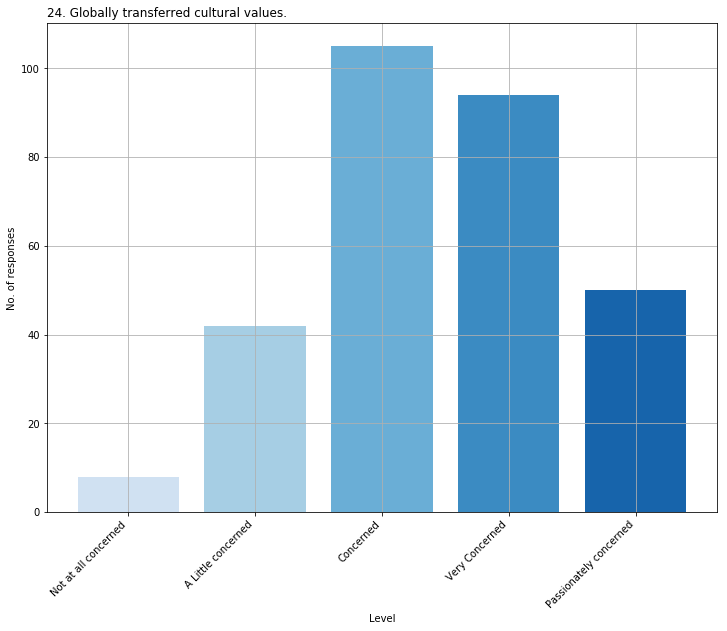

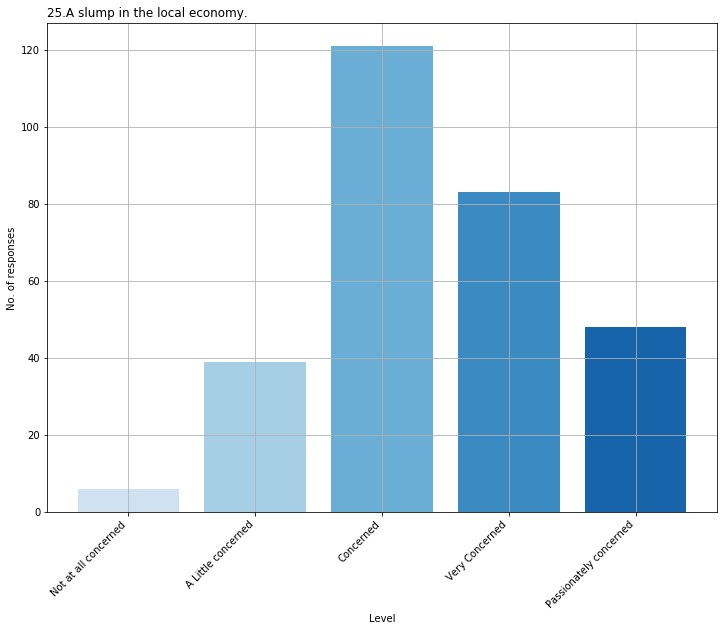

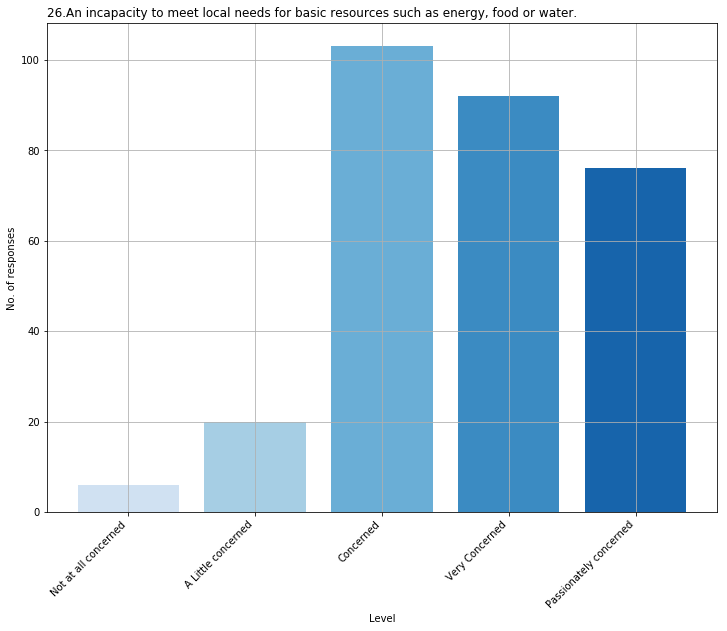

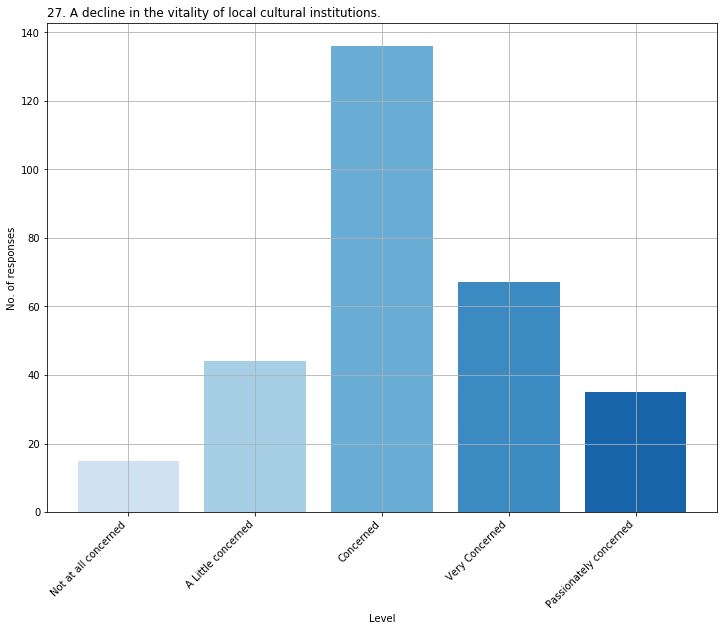

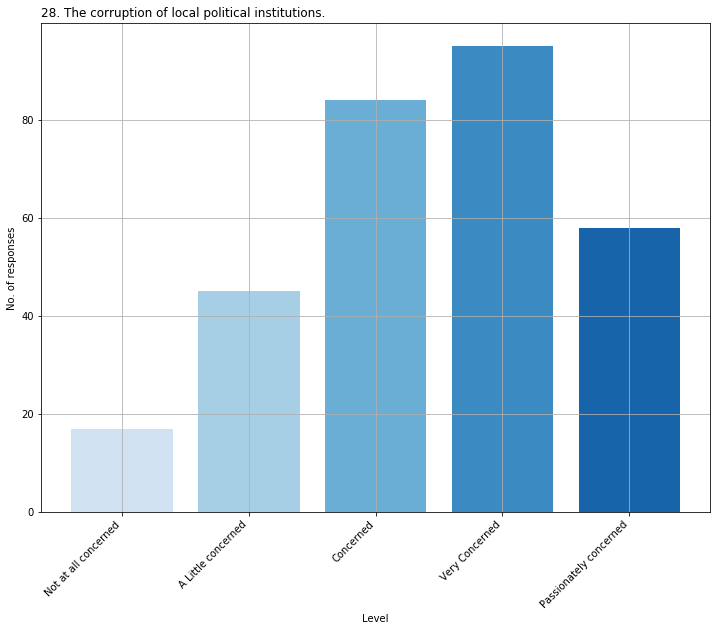

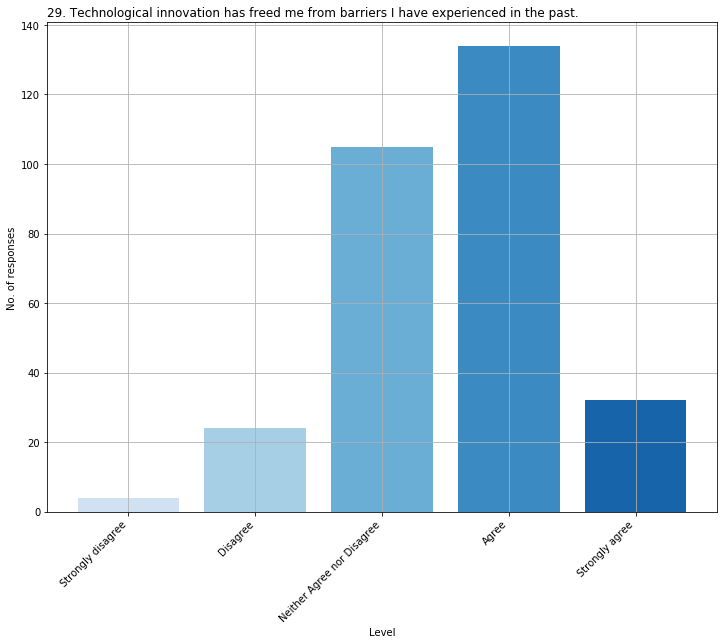

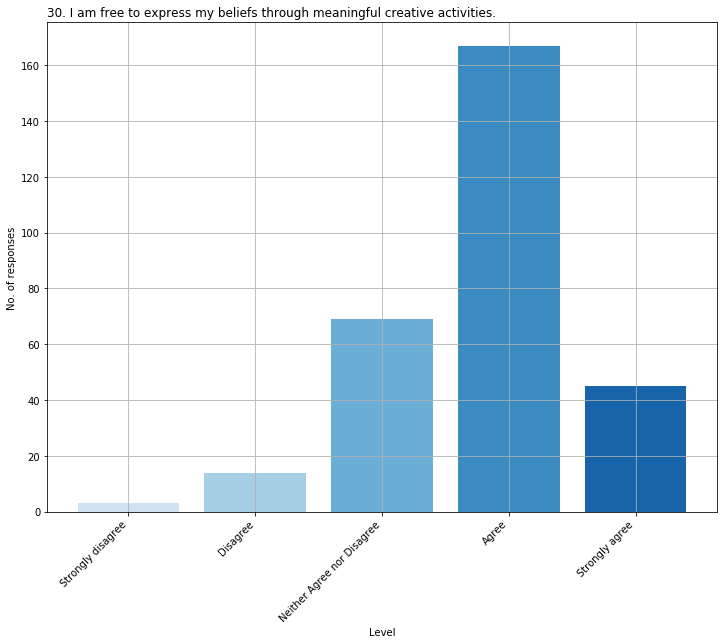

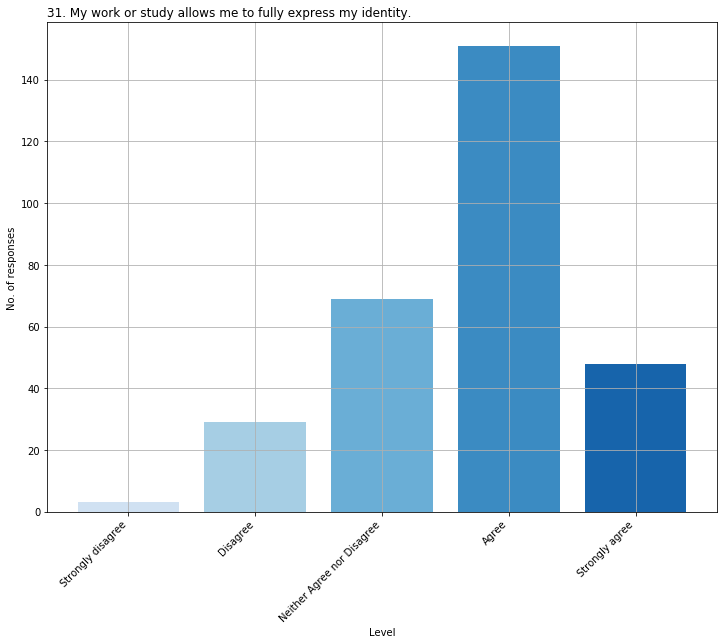

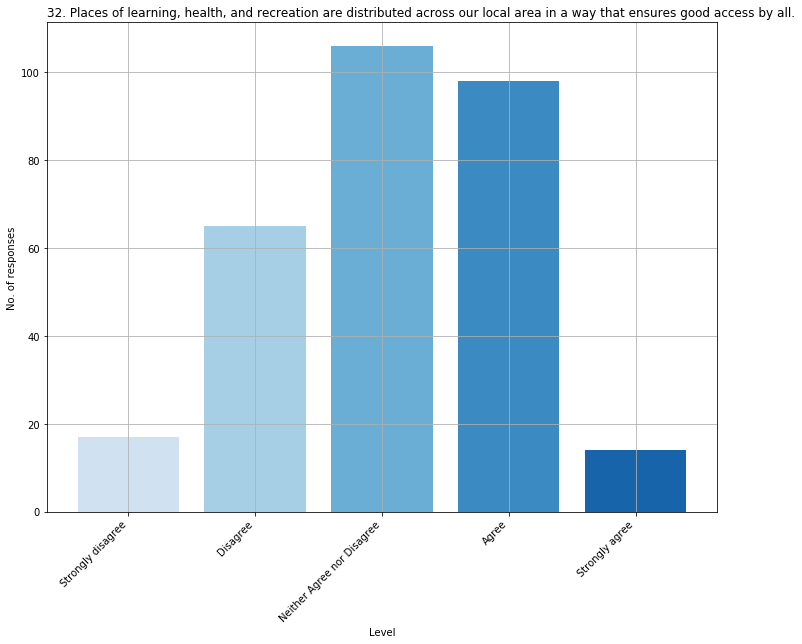

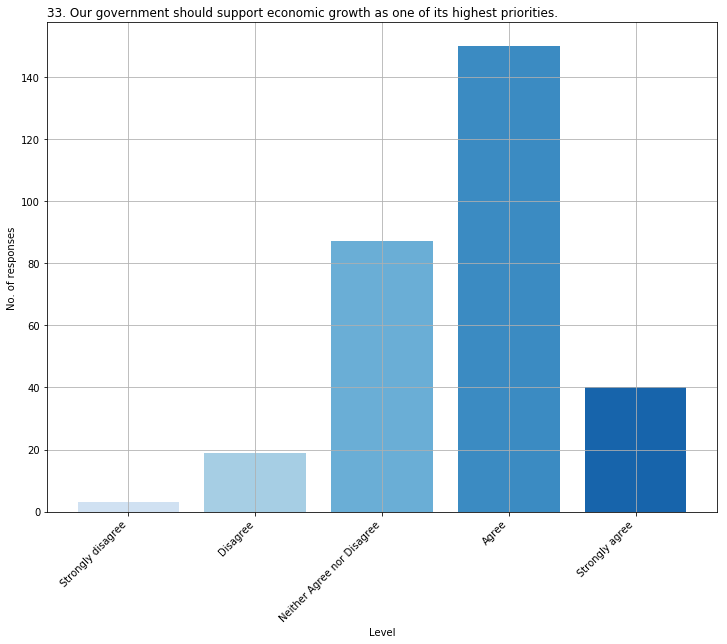

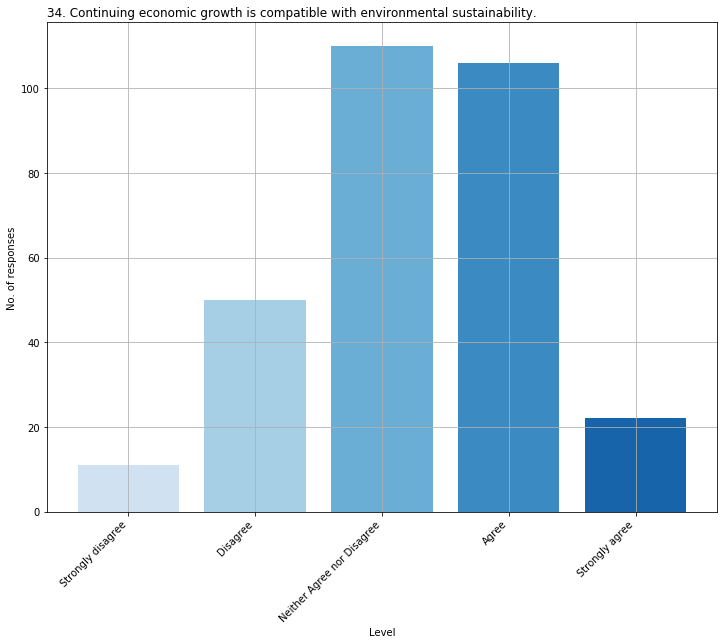

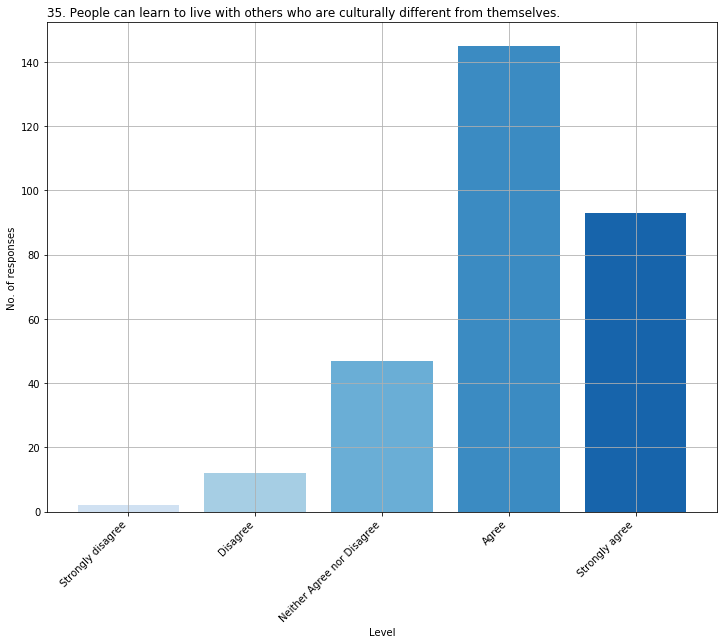

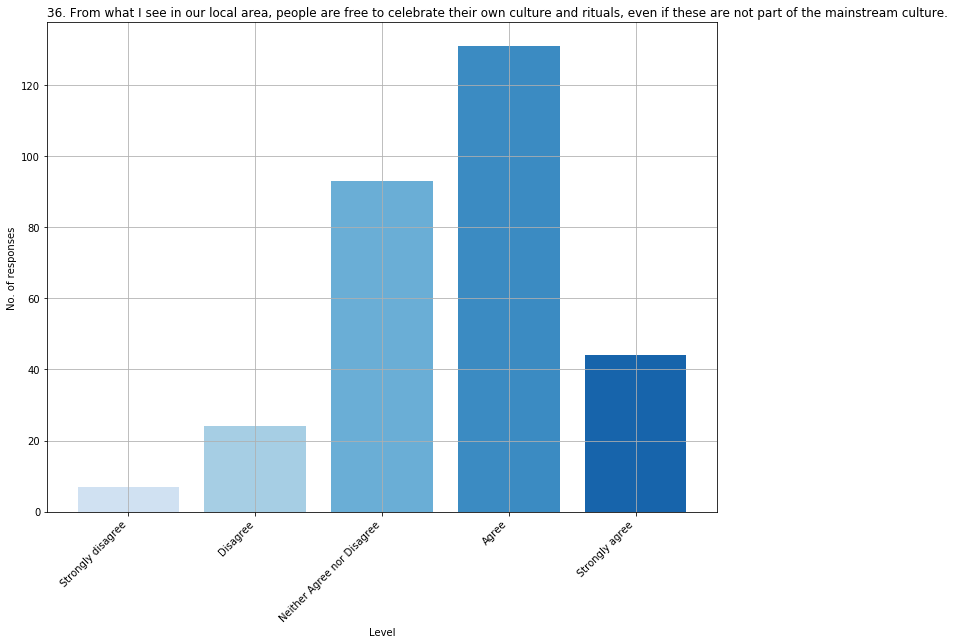

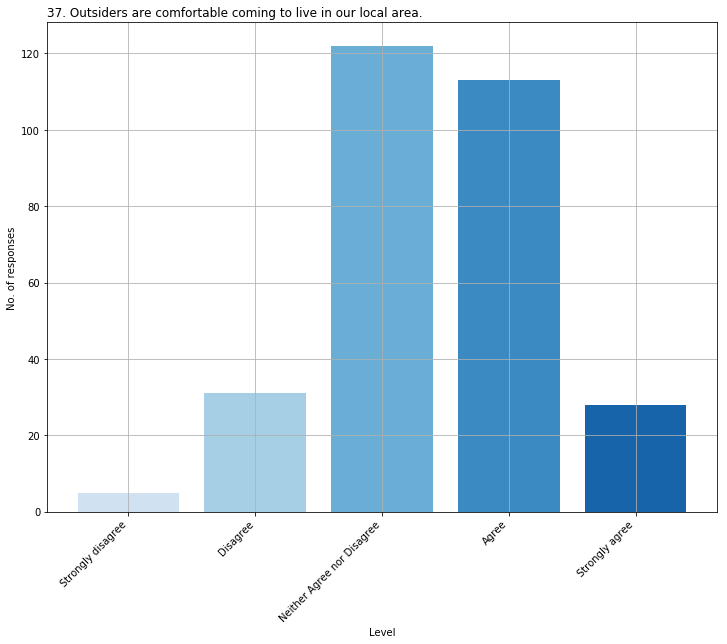

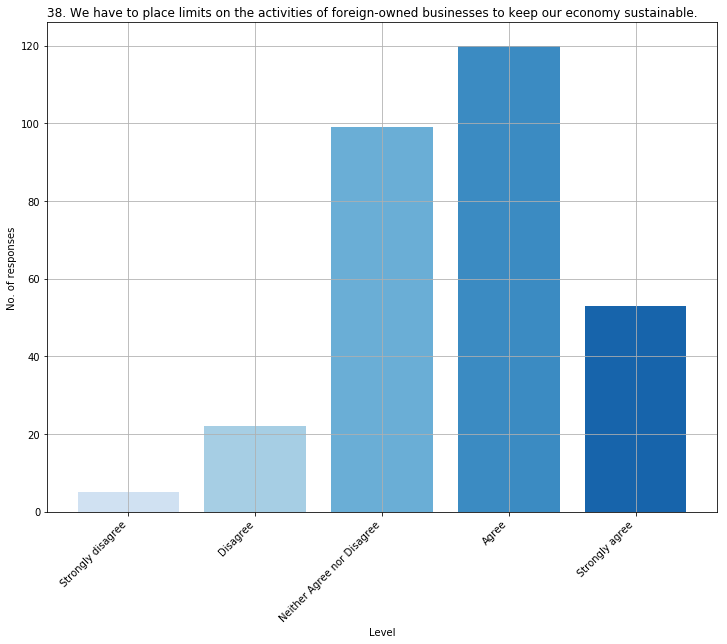

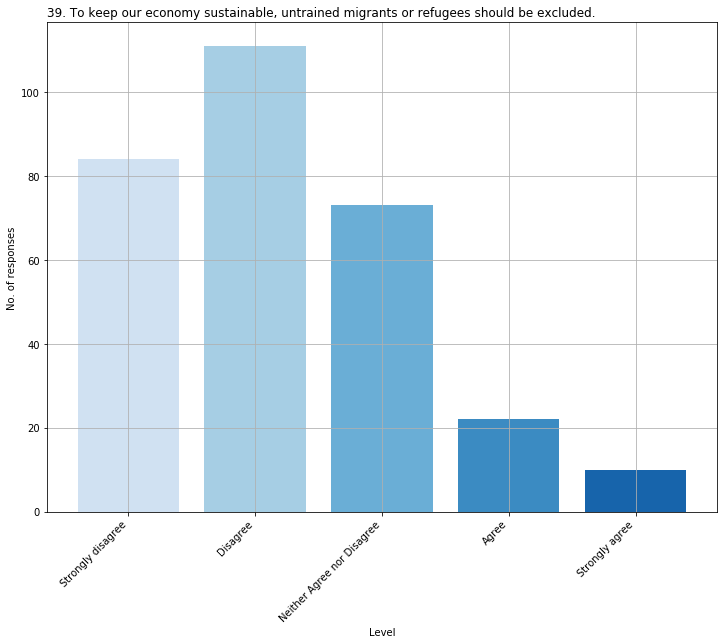

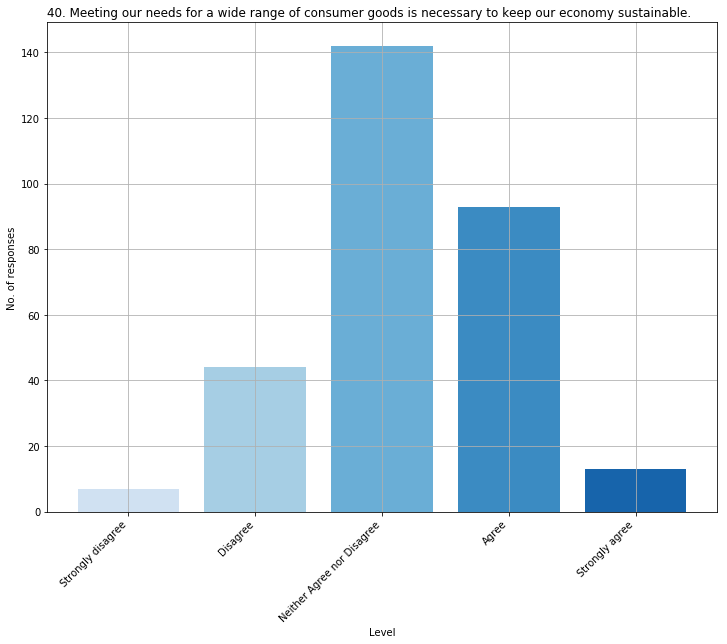

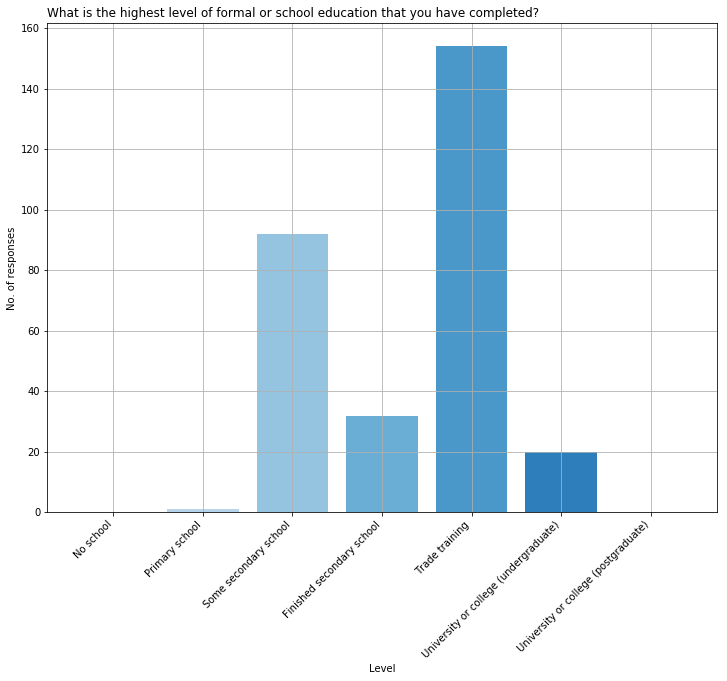

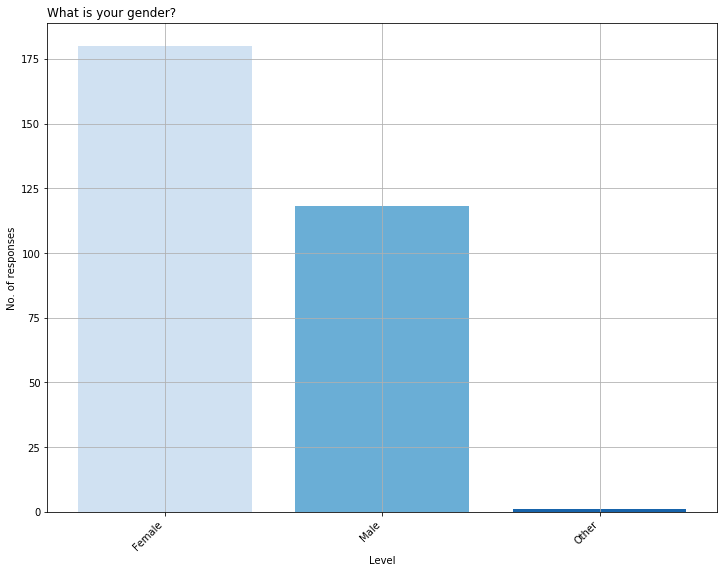

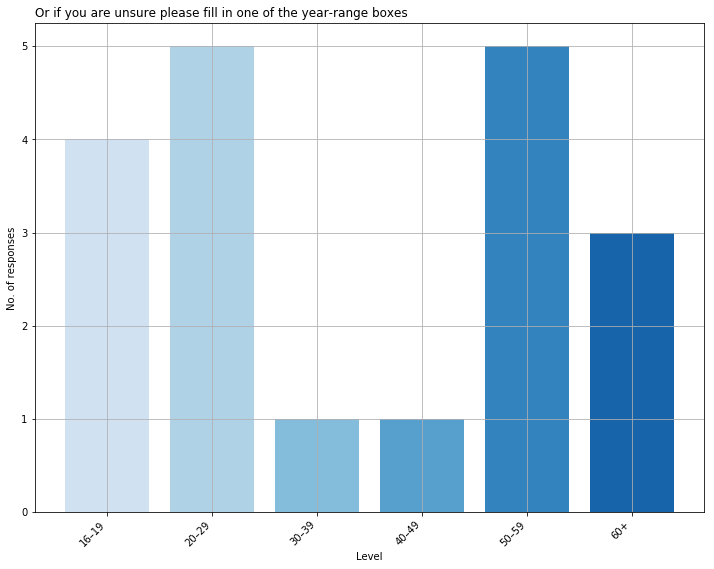

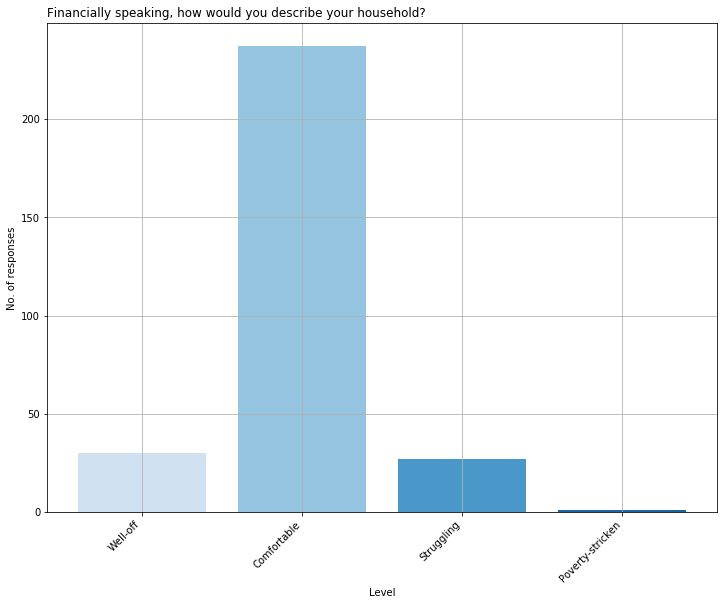

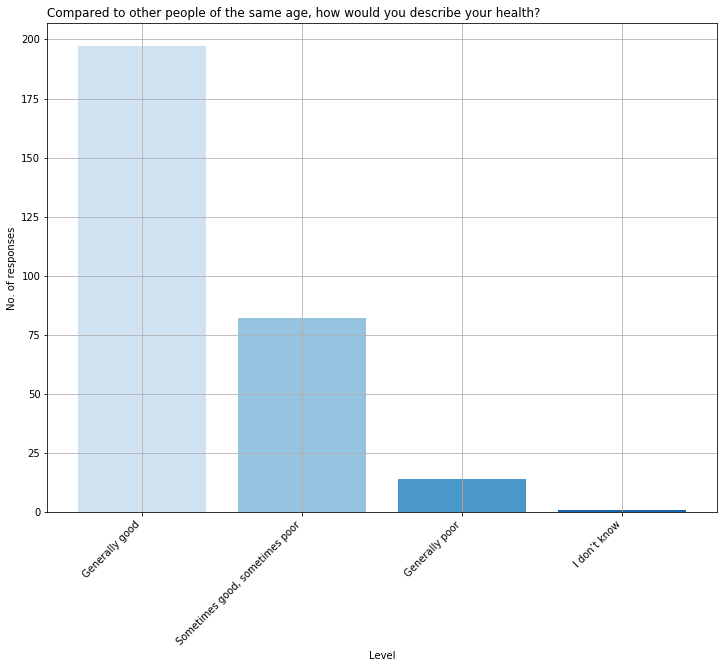

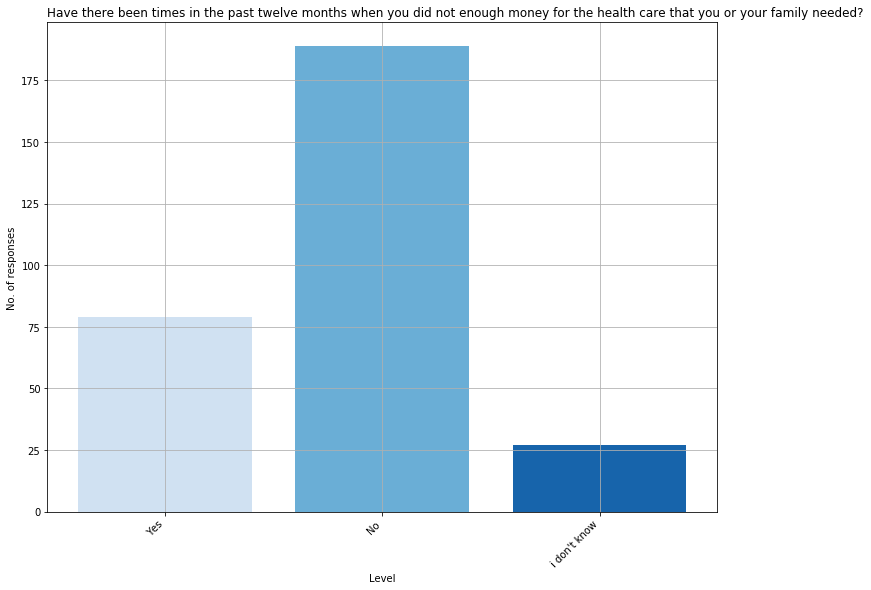

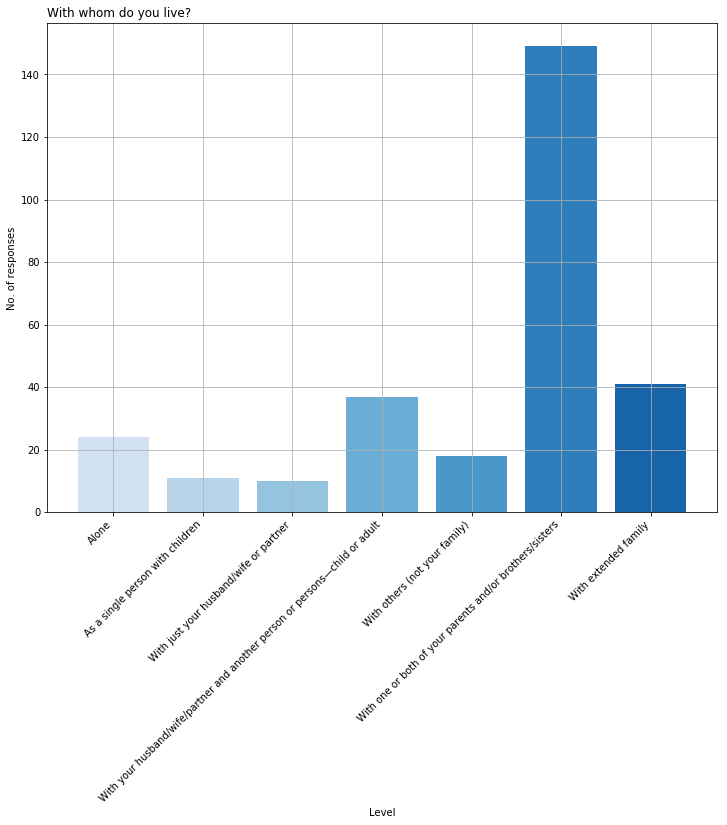

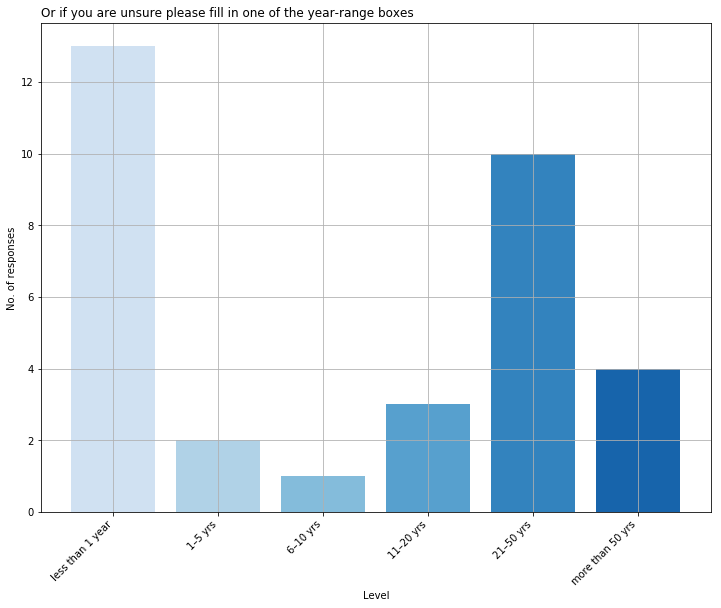

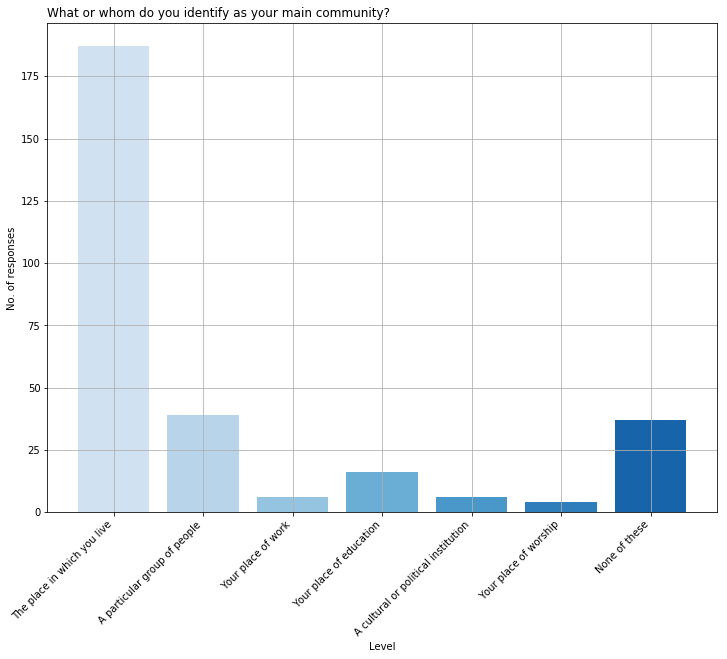

In [6]:
cols_not_to_render = ['Folio', 'Location', 'Soc_2a', 'Soc_8', 'Soc_9a']
cols_to_render = ['An_1', 'An_2', 'An_3', 'An_4', 'An_5', 'An_6',
       'An_7', 'An_8', 'An_9', 'An_10', 'An_11', 'An_12', 'An_13', 'An_14',
       'An_15', 'An_16', 'An_17', 'An_18', 'An_19', 'An_20', 'An_21', 'An_22',
       'An_23a', 'An_23b', 'An_23c', 'Satis_1', 'Satis_2', 'Satis_3',
       'Satis_4', 'Satis_5', 'Satis_6', 'Satis_7', 'Satis_8', 'Satis_9',
       'Satis_10', 'Satis_11', 'Satis_12', 'Satis_13', 'Satis_14', 'Satis_15',
       'Satis_16', 'Satis_17', 'Satis_18', 'Satis_19', 'Satis_20', 'Satis_21',
       'Satis_22', 'Satis_23', 'Satis_24', 'Satis_25', 'Satis_26', 'Satis_27',
       'Satis_28', 'Satis_29', 'Satis_30', 'Satis_31', 'Satis_32', 'Satis_33',
       'Satis_34', 'Satis_35', 'Satis_36', 'Satis_37', 'Satis_38', 'Satis_39',
       'Satis_40', 'Soc_1', 'Soc_3', 'Soc_2b', 'Soc_4', 'Soc_5',
       'Soc_6', 'Soc_7', 'Soc_9b','Soc_10']

[ds.gen_histogram(x) for x in cols_to_render];